# LSTM - datos 1 dia

Cargamos los datos:

In [3]:
run Datos-1dia.ipynb

Construimos el modelo:

In [4]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dense
from sklearn.metrics import mean_absolute_error,r2_score
from tensorflow import keras

In [5]:
def subida(list):
    resultado = []
    for i in range(1,len(list)):
        if  (list)[i] > (list)[i-1]:
            resultado.append(1)
        else:
            resultado.append(0)
    return resultado

def acierto(list1,list2):
    sum = 0
    for i in range(0,len(list1)):
        if(list1[i]==list2[i]):
            sum = sum +1
    a = sum/len(list1)
    return a


# CONJUNTO DE DATOS 1

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

In [4]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

Modelo 100 neuronas:

In [5]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 11, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 11, 50)            30200     
                                                                 
 lstm_2 (LSTM)               (None, 11, 33)            11088     
                                                                 
 lstm_3 (LSTM)               (None, 25)                5900      
                                                                 
 dense (Dense)               (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [6]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 15s 33ms/step - loss: 14395.2705
Epoch 2/100
48/48 [==============================] - 1s 24ms/step - loss: 10445.4785
Epoch 3/100
48/48 [==============================] - 1s 21ms/step - loss: 7145.6016
Epoch 4/100
48/48 [==============================] - 1s 22ms/step - loss: 6604.6108
Epoch 5/100
48/48 [==============================] - 1s 21ms/step - loss: 6119.7021
Epoch 6/100
48/48 [==============================] - 1s 21ms/step - loss: 5264.1143
Epoch 7/100
48/48 [==============================] - 1s 30ms/step - loss: 5466.9351
Epoch 8/100
48/48 [==============================] - 1s 27ms/step - loss: 5279.7671
Epoch 9/100
48/48 [==============================] - 1s 31ms/step - loss: 4079.5405
Epoch 10/100
48/48 [==============================] - 2s 35ms/step - loss: 3620.4600
Epoch 11/100
48/48 [==============================] - 2s 31ms/step - loss: 3732.4058
Epoch 12/100
48/48 [==============================] - 2s 32ms/step - lo

In [7]:
y_predLSTM100 = modelLSTM100.predict(testX1)

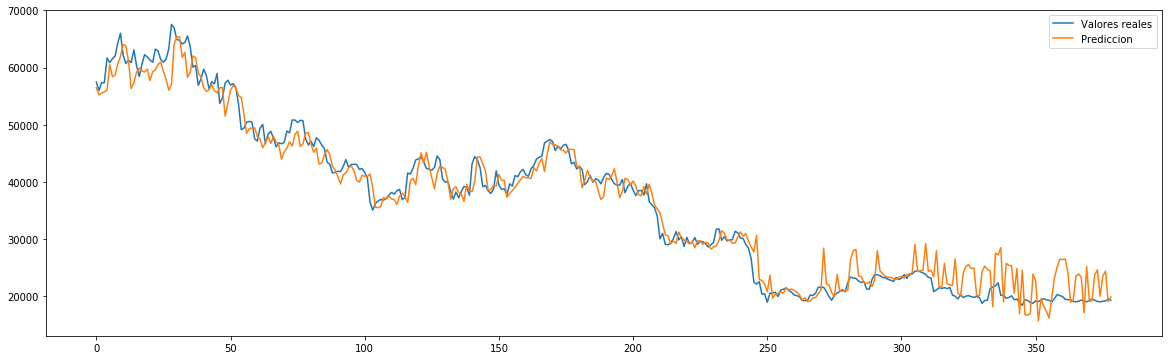

In [8]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [9]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 1973.7995032156991
R-cuadrado: 0.9627915989345632
Tasa de acierto de subida: 0.49206349206349204


Modelo 64 neuronas

In [10]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 11, 64)            16896     
                                                                 
 lstm_5 (LSTM)               (None, 11, 32)            12416     
                                                                 
 lstm_6 (LSTM)               (None, 11, 21)            4536      
                                                                 
 lstm_7 (LSTM)               (None, 16)                2432      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [11]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 14s 19ms/step - loss: 15071.6982
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 14588.8574
Epoch 3/100
48/48 [==============================] - 1s 18ms/step - loss: 9936.9268
Epoch 4/100
48/48 [==============================] - 1s 20ms/step - loss: 4722.2754
Epoch 5/100
48/48 [==============================] - 1s 17ms/step - loss: 4917.1738
Epoch 6/100
48/48 [==============================] - 1s 17ms/step - loss: 7464.3325
Epoch 7/100
48/48 [==============================] - 1s 16ms/step - loss: 6736.6621
Epoch 8/100
48/48 [==============================] - 1s 19ms/step - loss: 6309.1274
Epoch 9/100
48/48 [==============================] - 1s 27ms/step - loss: 4642.9180
Epoch 10/100
48/48 [==============================] - 1s 27ms/step - loss: 3413.2168
Epoch 11/100
48/48 [==============================] - 1s 22ms/step - loss: 3490.1243
Epoch 12/100
48/48 [==============================] - 1s 21ms/step - lo

In [12]:
y_predLSTM64 = modelLSTM64.predict(testX1)

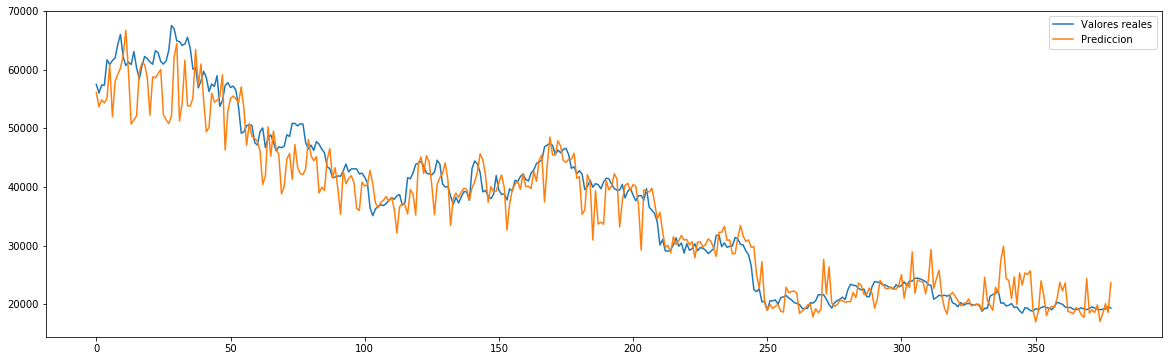

In [13]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [14]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2666.242810026385
R-cuadrado: 0.925417958118195
Tasa de acierto de subida: 0.5


Modelo 32 neuronas:

In [15]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 11, 32)            4352      
                                                                 
 lstm_9 (LSTM)               (None, 11, 16)            3136      
                                                                 
 lstm_10 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 640       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [16]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 15s 20ms/step - loss: 15197.5254
Epoch 2/100
48/48 [==============================] - 1s 20ms/step - loss: 15118.7148
Epoch 3/100
48/48 [==============================] - 1s 19ms/step - loss: 14479.8086
Epoch 4/100
48/48 [==============================] - 1s 20ms/step - loss: 13678.7676
Epoch 5/100
48/48 [==============================] - 1s 20ms/step - loss: 12949.3643
Epoch 6/100
48/48 [==============================] - 1s 18ms/step - loss: 10468.5635
Epoch 7/100
48/48 [==============================] - 1s 16ms/step - loss: 19175.9355
Epoch 8/100
48/48 [==============================] - 1s 15ms/step - loss: 8721.2275
Epoch 9/100
48/48 [==============================] - 1s 16ms/step - loss: 2921.8796
Epoch 10/100
48/48 [==============================] - 1s 21ms/step - loss: 3233.6646
Epoch 11/100
48/48 [==============================] - 1s 19ms/step - loss: 6192.2988
Epoch 12/100
48/48 [==============================] - 1s 21ms/step

In [17]:
y_predLSTM32 = modelLSTM32.predict(testX1)

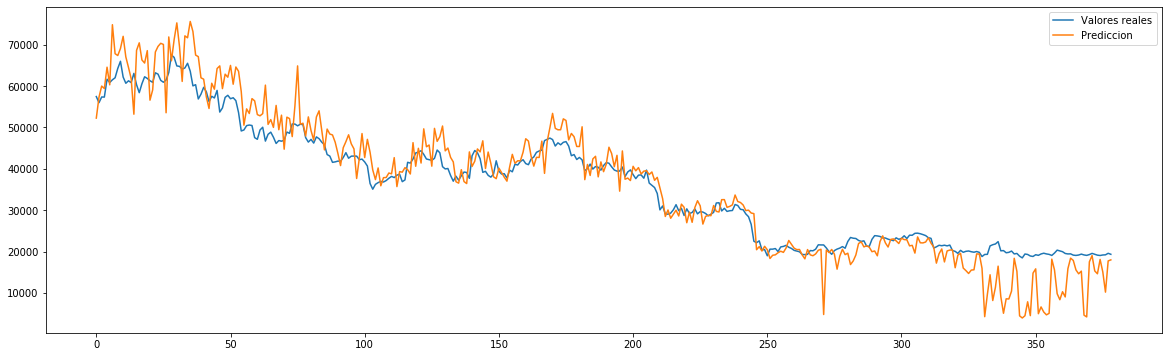

In [18]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [19]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 3804.434165026179
R-cuadrado: 0.858252118420463
Tasa de acierto de subida: 0.5026455026455027


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [20]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

Modelo 100 neuronas:

In [21]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_14 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 10s 29ms/step - loss: 13472.9902 - mae: 13472.9902
Epoch 2/100
48/48 [==============================] - 1s 24ms/step - loss: 4511.2295 - mae: 4511.2295
Epoch 3/100
48/48 [==============================] - 1s 24ms/step - loss: 3486.7063 - mae: 3486.7063
Epoch 4/100
48/48 [==============================] - 1s 29ms/step - loss: 2733.0400 - mae: 2733.0400
Epoch 5/100
48/48 [==============================] - 1s 26ms/step - loss: 3876.7217 - mae: 3876.7217
Epoch 6/100
48/48 [==============================] - 1s 24ms/step - loss: 3201.4927 - mae: 3201.4927
Epoch 7/100
48/48 [==============================] - 1s 24ms/step - loss: 2362.5947 - mae: 2362.5947
Epoch 8/100
48/48 [==============================] - 1s 24ms/step - loss: 2534.0361 - mae: 2534.0361
Epoch 9/100
48/48 [==============================] - 1s 28ms/step - loss: 2772.1633 - mae: 2772.1633
Epoch 10/100
48/48 [==============================] - 1s 30ms/step - loss: 3161.6179 - m

In [23]:
y_predLSTM100 = modelLSTM100.predict(testX1)

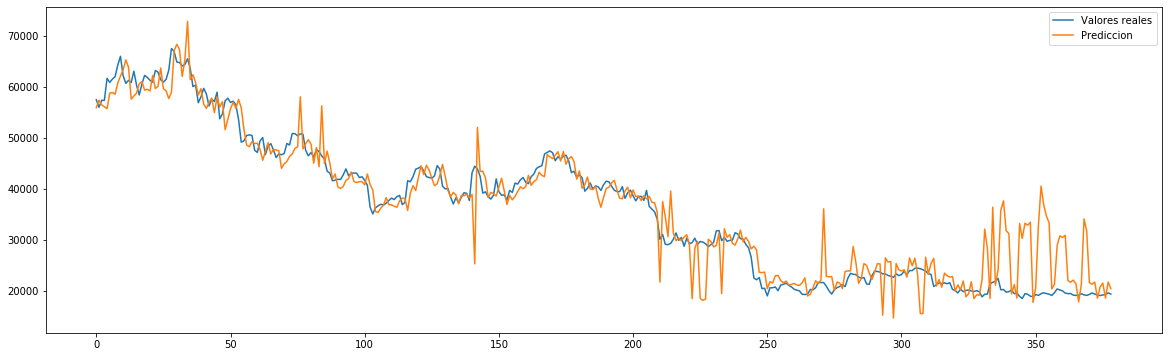

In [24]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [25]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2861.758940880607
R-cuadrado: 0.8929387760239521
Tasa de acierto de subida: 0.5052910052910053


Modelo 64 neuronas

In [26]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_17 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_18 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_19 (LSTM)              (None, 32)                8320      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [27]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 8s 19ms/step - loss: 9131.0850 - mae: 9131.0850
Epoch 2/100
48/48 [==============================] - 1s 19ms/step - loss: 2864.1731 - mae: 2864.1731
Epoch 3/100
48/48 [==============================] - 1s 21ms/step - loss: 3681.8486 - mae: 3681.8486
Epoch 4/100
48/48 [==============================] - 1s 21ms/step - loss: 1938.3022 - mae: 1938.3022
Epoch 5/100
48/48 [==============================] - 1s 20ms/step - loss: 2446.3484 - mae: 2446.3484
Epoch 6/100
48/48 [==============================] - 1s 19ms/step - loss: 2420.3708 - mae: 2420.3708
Epoch 7/100
48/48 [==============================] - 1s 20ms/step - loss: 6232.4043 - mae: 6232.4043
Epoch 8/100
48/48 [==============================] - 1s 20ms/step - loss: 5020.0142 - mae: 5020.0142
Epoch 9/100
48/48 [==============================] - 1s 21ms/step - loss: 2957.6877 - mae: 2957.6877
Epoch 10/100
48/48 [==============================] - 1s 22ms/step - loss: 2897.0320 - mae:

In [28]:
y_predLSTM64 = modelLSTM64.predict(testX1)

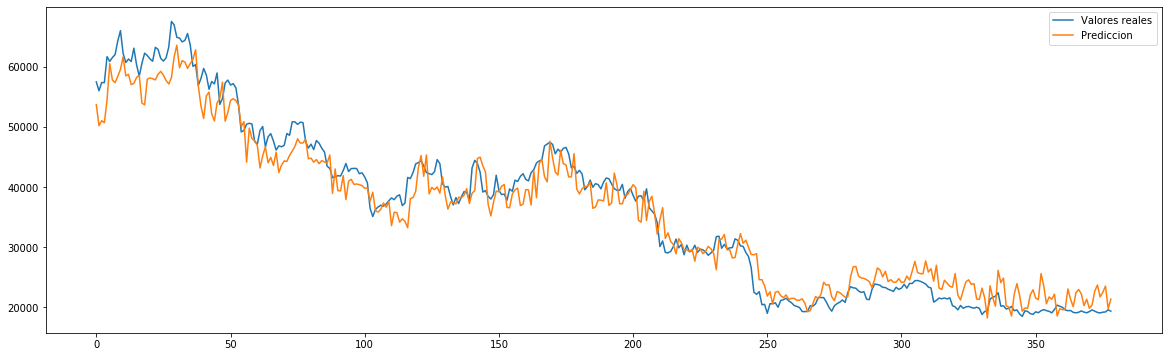

In [29]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [30]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 2462.9635624175457
R-cuadrado: 0.952426907051007
Tasa de acierto de subida: 0.47354497354497355


Modelo 32 neuronas:

In [31]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_21 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_22 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_23 (LSTM)              (None, 16)                2112      
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [32]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 11s 17ms/step - loss: 15316.9883 - mae: 15316.9883
Epoch 2/100
48/48 [==============================] - 1s 15ms/step - loss: 14952.6914 - mae: 14952.6914
Epoch 3/100
48/48 [==============================] - 1s 16ms/step - loss: 14655.6924 - mae: 14655.6924
Epoch 4/100
48/48 [==============================] - 1s 16ms/step - loss: 9935.7949 - mae: 9935.7949
Epoch 5/100
48/48 [==============================] - 1s 16ms/step - loss: 7080.3325 - mae: 7080.3325
Epoch 6/100
48/48 [==============================] - 1s 15ms/step - loss: 10876.2842 - mae: 10876.2842
Epoch 7/100
48/48 [==============================] - 1s 15ms/step - loss: 9826.7148 - mae: 9826.7148
Epoch 8/100
48/48 [==============================] - 1s 15ms/step - loss: 6005.3091 - mae: 6005.3091
Epoch 9/100
48/48 [==============================] - 1s 17ms/step - loss: 3784.9617 - mae: 3784.9617
Epoch 10/100
48/48 [==============================] - 1s 18ms/step - loss: 2046.87

In [33]:
y_predLSTM32 = modelLSTM32.predict(testX1)

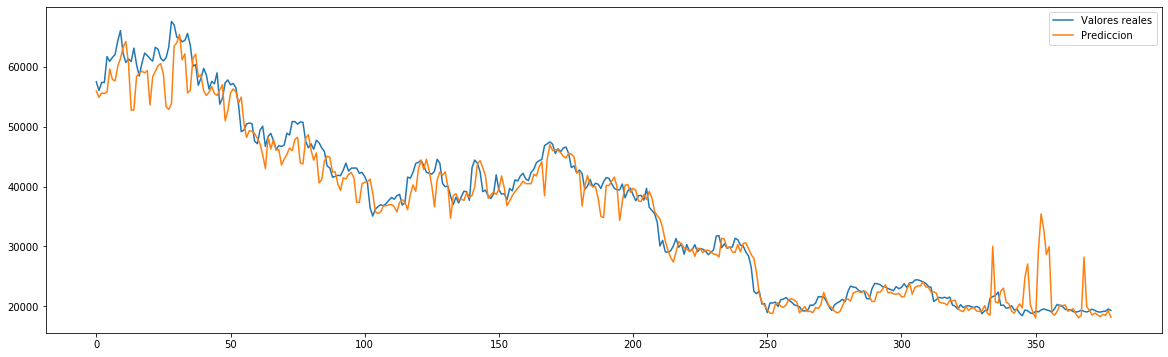

In [34]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [35]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 1912.7398742579155
R-cuadrado: 0.9546732878177436
Tasa de acierto de subida: 0.4947089947089947


### EXPERIMENTO 3: Modelo 10 capas

In [36]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(11, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model


Modelo 100 neuronas:

In [37]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_24 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_25 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_26 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_27 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_28 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_29 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_30 (LSTM)              (None, 11, 14)           

In [38]:
y_predLSTM100 = modelLSTM100.predict(testX1)

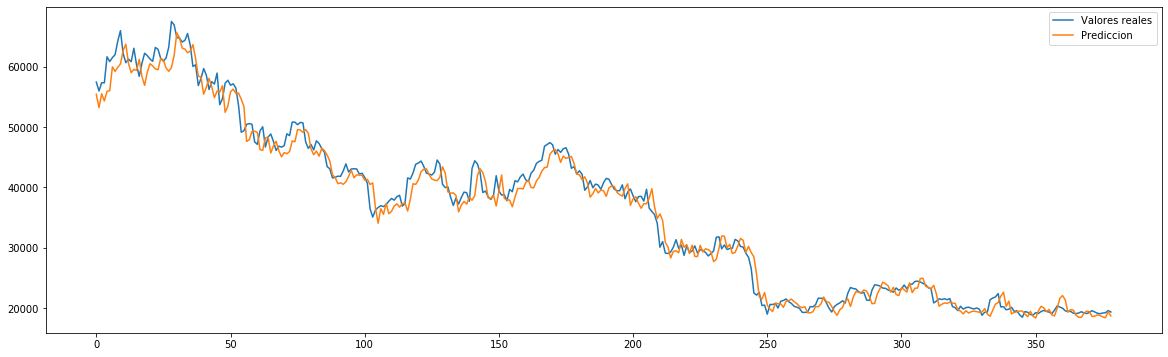

In [39]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [40]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 1467.3471334927438
R-cuadrado: 0.9803469228432141
Tasa de acierto de subida: 0.48148148148148145


Modelo 64 neuronas:

In [41]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_34 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_35 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_36 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_37 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_38 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_39 (LSTM)              (None, 11, 9)            

In [42]:
y_predLSTM64 = modelLSTM64.predict(testX1)

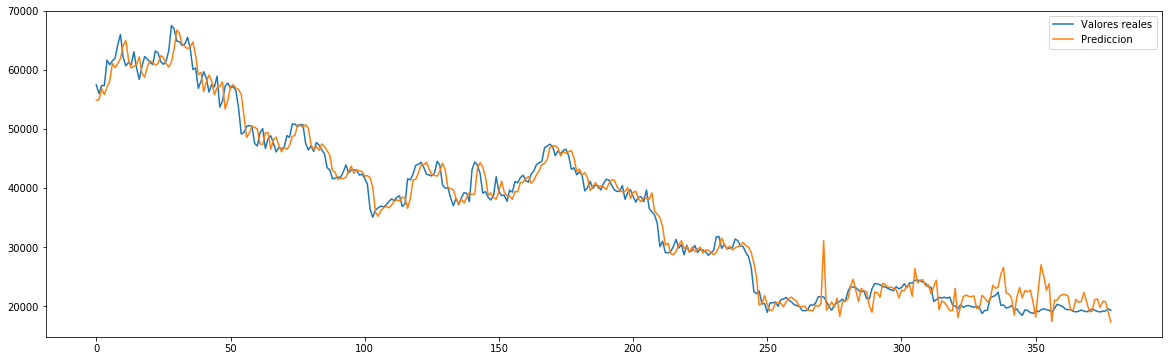

In [43]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [44]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 1513.7047979881265
R-cuadrado: 0.9788346341791627
Tasa de acierto de subida: 0.46296296296296297


Modelo 32 neuronas:

In [45]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_43 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_44 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_45 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_46 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_47 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_48 (LSTM)              (None, 11, 5)            

In [46]:
y_predLSTM32 = modelLSTM32.predict(testX1)

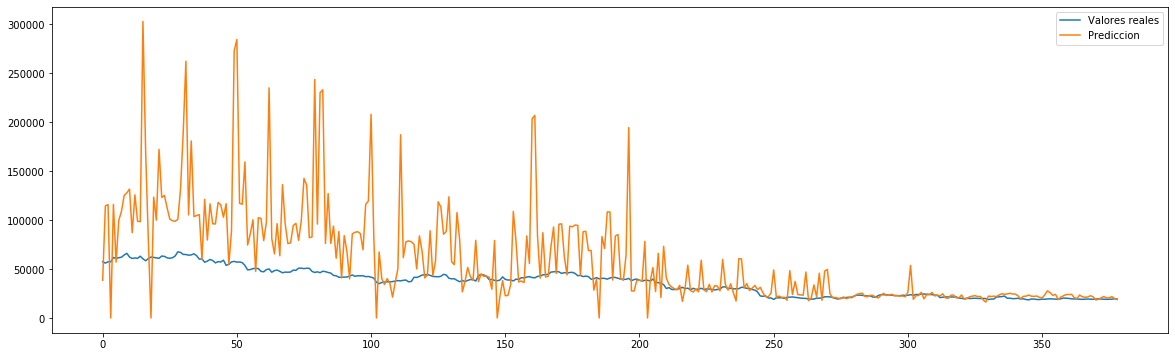

In [47]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [48]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 26518.848483034097
R-cuadrado: -10.42622061978616
Tasa de acierto de subida: 0.4973544973544973


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [49]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_51 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_52 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_53 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_54 (LSTM)              (None, 25)                5900      
                                                                 
 dense_9 (Dense)             (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [50]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 9s 30ms/step - loss: 15125.3994
Epoch 2/100
48/48 [==============================] - 1s 29ms/step - loss: 15102.2695
Epoch 3/100
48/48 [==============================] - 1s 27ms/step - loss: 15070.7656
Epoch 4/100
48/48 [==============================] - 1s 24ms/step - loss: 14953.2861
Epoch 5/100
48/48 [==============================] - 1s 24ms/step - loss: 14962.7070
Epoch 6/100
48/48 [==============================] - 1s 28ms/step - loss: 14975.0312
Epoch 7/100
48/48 [==============================] - 1s 30ms/step - loss: 14921.8740
Epoch 8/100
48/48 [==============================] - 1s 26ms/step - loss: 14827.0771
Epoch 9/100
48/48 [==============================] - 1s 28ms/step - loss: 14901.1807
Epoch 10/100
48/48 [==============================] - 1s 24ms/step - loss: 14729.5098
Epoch 11/100
48/48 [==============================] - 1s 24ms/step - loss: 14850.5381
Epoch 12/100
48/48 [==============================] - 1s 24ms/s

In [51]:
y_predLSTM100 = modelLSTM100.predict(testX1)

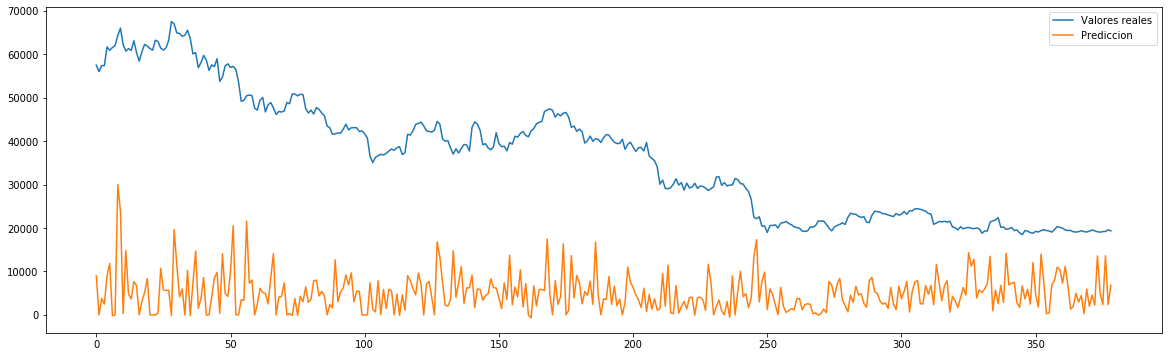

In [52]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [53]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 31076.30711284559
R-cuadrado: -4.964262194536544
Tasa de acierto de subida: 0.48412698412698413


Modelo 64 neuronas

In [54]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_55 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_56 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_57 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_58 (LSTM)              (None, 16)                2432      
                                                                 
 dense_10 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [55]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 9s 20ms/step - loss: 14633.0693
Epoch 2/100
48/48 [==============================] - 1s 19ms/step - loss: 14336.4590
Epoch 3/100
48/48 [==============================] - 1s 19ms/step - loss: 14182.3428
Epoch 4/100
48/48 [==============================] - 1s 19ms/step - loss: 14061.3115
Epoch 5/100
48/48 [==============================] - 1s 18ms/step - loss: 14363.8779
Epoch 6/100
48/48 [==============================] - 1s 20ms/step - loss: 14003.4814
Epoch 7/100
48/48 [==============================] - 1s 20ms/step - loss: 13865.6309
Epoch 8/100
48/48 [==============================] - 1s 20ms/step - loss: 13770.2852
Epoch 9/100
48/48 [==============================] - 1s 19ms/step - loss: 13818.6582
Epoch 10/100
48/48 [==============================] - 1s 18ms/step - loss: 13748.8535
Epoch 11/100
48/48 [==============================] - 1s 17ms/step - loss: 13673.3467
Epoch 12/100
48/48 [==============================] - 1s 18ms/s

Epoch 97/100
48/48 [==============================] - 1s 20ms/step - loss: 6845.9668
Epoch 98/100
48/48 [==============================] - 1s 19ms/step - loss: 6818.7183
Epoch 99/100
48/48 [==============================] - 1s 18ms/step - loss: 6749.4453
Epoch 100/100
12/12 [==============================] - 1s 7ms/step - loss: 12952.8271


In [56]:
y_predLSTM64 = modelLSTM64.predict(testX1)

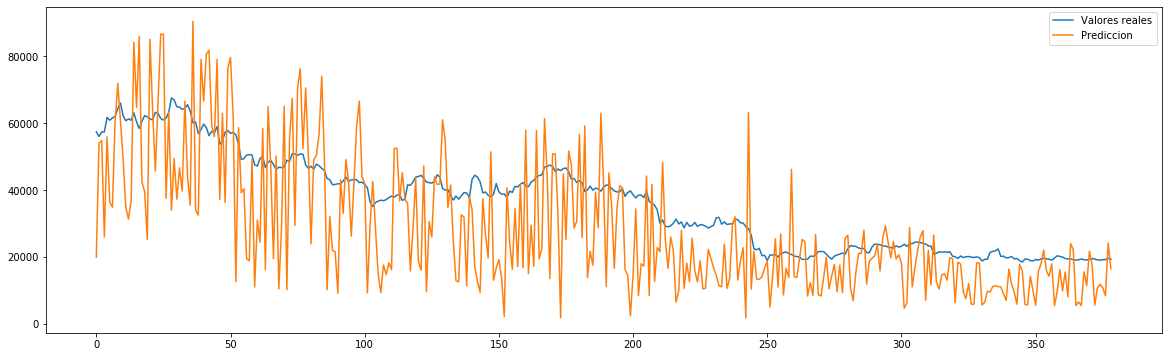

In [57]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [58]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 12952.826914268635
R-cuadrado: -0.3545415817956632
Tasa de acierto de subida: 0.4947089947089947


Modelo 32 neuronas:

In [59]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_59 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_60 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_61 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_62 (LSTM)              (None, 8)                 640       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [61]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 1s 17ms/step - loss: 10923.6611
Epoch 2/100
48/48 [==============================] - 1s 16ms/step - loss: 10856.4668
Epoch 3/100
48/48 [==============================] - 1s 15ms/step - loss: 10955.9707
Epoch 4/100
48/48 [==============================] - 1s 15ms/step - loss: 10949.3037
Epoch 5/100
48/48 [==============================] - 1s 17ms/step - loss: 10956.4688
Epoch 6/100
48/48 [==============================] - 1s 16ms/step - loss: 11000.3760
Epoch 7/100
48/48 [==============================] - 1s 16ms/step - loss: 10832.4844
Epoch 8/100
48/48 [==============================] - 1s 15ms/step - loss: 10814.7871
Epoch 9/100
48/48 [==============================] - 1s 15ms/step - loss: 10822.9951
Epoch 10/100
48/48 [==============================] - 1s 15ms/step - loss: 10666.2910
Epoch 11/100
48/48 [==============================] - 1s 14ms/step - loss: 10650.1738
Epoch 12/100
48/48 [==============================] - 1s 17ms/s

In [62]:
y_predLSTM32 = modelLSTM32.predict(testX1)

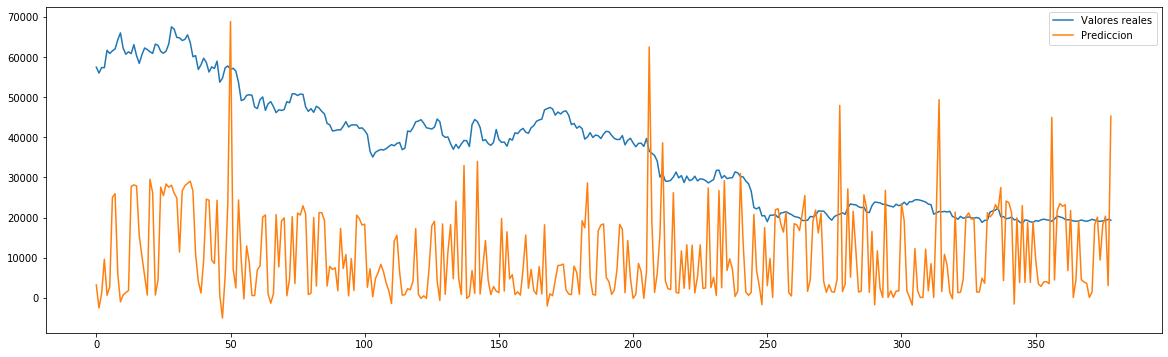

In [63]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [64]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 26715.330363373367
R-cuadrado: -3.8584072022736766
Tasa de acierto de subida: 0.5264550264550265


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [65]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_63 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_64 (LSTM)              (None, 11, 100)           80400     
                                                                 
 lstm_65 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_66 (LSTM)              (None, 50)                20200     
                                                                 
 dense_12 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [66]:
modelLSTM100.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX1, testy1)

Epoch 1/100
48/48 [==============================] - 8s 26ms/step - loss: 12921.9561 - mae: 12921.9561
Epoch 2/100
48/48 [==============================] - 1s 27ms/step - loss: 12360.4160 - mae: 12360.4160
Epoch 3/100
48/48 [==============================] - 1s 26ms/step - loss: 10551.0098 - mae: 10551.0098
Epoch 4/100
48/48 [==============================] - 1s 26ms/step - loss: 9487.9463 - mae: 9487.9463
Epoch 5/100
48/48 [==============================] - 1s 27ms/step - loss: 8557.8604 - mae: 8557.8604
Epoch 6/100
48/48 [==============================] - 1s 26ms/step - loss: 6902.9351 - mae: 6902.9351
Epoch 7/100
48/48 [==============================] - 1s 26ms/step - loss: 5161.1558 - mae: 5161.1558
Epoch 8/100
48/48 [==============================] - 1s 27ms/step - loss: 4022.3601 - mae: 4022.3601
Epoch 9/100
48/48 [==============================] - 1s 27ms/step - loss: 3304.2795 - mae: 3304.2795
Epoch 10/100
48/48 [==============================] - 1s 27ms/step - loss: 2641.9241 

In [67]:
y_predLSTM100 = modelLSTM100.predict(testX1)

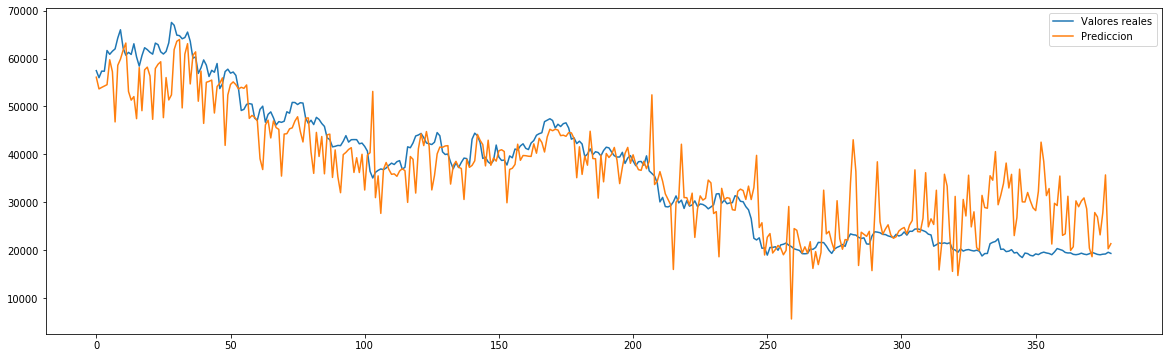

In [68]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [69]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 4757.081362446405
R-cuadrado: 0.7702568734641455
Tasa de acierto de subida: 0.4656084656084656


Modelo 64 neuronas

In [70]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_67 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_68 (LSTM)              (None, 11, 64)            33024     
                                                                 
 lstm_69 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_70 (LSTM)              (None, 32)                8320      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [71]:
modelLSTM64.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 7s 23ms/step - loss: 14618.3896 - mae: 14618.3896
Epoch 2/100
48/48 [==============================] - 1s 22ms/step - loss: 14444.8369 - mae: 14444.8369
Epoch 3/100
48/48 [==============================] - 1s 22ms/step - loss: 13954.0303 - mae: 13954.0303
Epoch 4/100
48/48 [==============================] - 1s 22ms/step - loss: 13438.7441 - mae: 13438.7441
Epoch 5/100
48/48 [==============================] - 1s 21ms/step - loss: 13336.4160 - mae: 13336.4160
Epoch 6/100
48/48 [==============================] - 1s 23ms/step - loss: 13271.3193 - mae: 13271.3193
Epoch 7/100
48/48 [==============================] - 1s 24ms/step - loss: 12849.1035 - mae: 12849.1035
Epoch 8/100
48/48 [==============================] - 1s 24ms/step - loss: 12479.1523 - mae: 12479.1523
Epoch 9/100
48/48 [==============================] - 1s 24ms/step - loss: 12311.3955 - mae: 12311.3955
Epoch 10/100
48/48 [==============================] - 1s 21ms/step - loss

48/48 [==============================] - 1s 22ms/step - loss: 7209.8521 - mae: 7209.8521
Epoch 82/100
48/48 [==============================] - 1s 21ms/step - loss: 7218.5454 - mae: 7218.5454
Epoch 83/100
48/48 [==============================] - 1s 20ms/step - loss: 7118.1875 - mae: 7118.1875
Epoch 84/100
48/48 [==============================] - 1s 20ms/step - loss: 7053.0371 - mae: 7053.0371
Epoch 85/100
48/48 [==============================] - 1s 20ms/step - loss: 7108.9424 - mae: 7108.9424
Epoch 86/100
48/48 [==============================] - 1s 20ms/step - loss: 7076.6987 - mae: 7076.6987
Epoch 87/100
48/48 [==============================] - 1s 20ms/step - loss: 7054.5269 - mae: 7054.5269
Epoch 88/100
48/48 [==============================] - 1s 20ms/step - loss: 7003.3770 - mae: 7003.3770
Epoch 89/100
48/48 [==============================] - 1s 20ms/step - loss: 6838.7681 - mae: 6838.7681
Epoch 90/100
48/48 [==============================] - 1s 20ms/step - loss: 6874.8647 - mae: 687

In [72]:
y_predLSTM64 = modelLSTM64.predict(testX1)

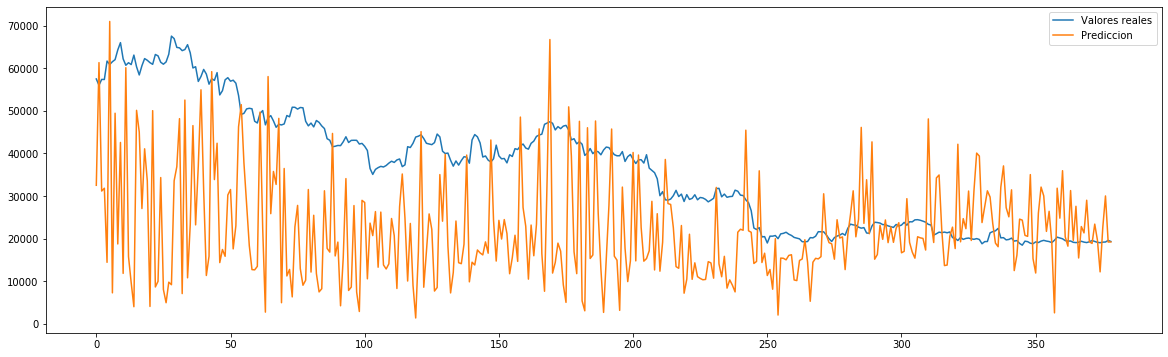

In [73]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [74]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 17274.226692132874
R-cuadrado: -1.5132427351845523
Tasa de acierto de subida: 0.5132275132275133


Modelo 32 neuronas:

In [75]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_72 (LSTM)              (None, 11, 32)            8320      
                                                                 
 lstm_73 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_74 (LSTM)              (None, 16)                2112      
                                                                 
 dense_14 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [76]:
modelLSTM32.fit(trainX1, trainy1, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX1, testy1)
 

Epoch 1/100
48/48 [==============================] - 8s 18ms/step - loss: 15286.9268 - mae: 15286.9268
Epoch 2/100
48/48 [==============================] - 1s 23ms/step - loss: 14789.8574 - mae: 14789.8574
Epoch 3/100
48/48 [==============================] - 1s 23ms/step - loss: 14422.9072 - mae: 14422.9072
Epoch 4/100
48/48 [==============================] - 1s 23ms/step - loss: 14084.1006 - mae: 14084.1006
Epoch 5/100
48/48 [==============================] - 1s 19ms/step - loss: 13710.5342 - mae: 13710.5342
Epoch 6/100
48/48 [==============================] - 1s 18ms/step - loss: 13489.0732 - mae: 13489.0732
Epoch 7/100
48/48 [==============================] - 1s 19ms/step - loss: 13148.0459 - mae: 13148.0459
Epoch 8/100
48/48 [==============================] - 1s 18ms/step - loss: 12749.1133 - mae: 12749.1133
Epoch 9/100
48/48 [==============================] - 1s 18ms/step - loss: 12453.1396 - mae: 12453.1396
Epoch 10/100
48/48 [==============================] - 1s 19ms/step - loss

48/48 [==============================] - 1s 15ms/step - loss: 2193.4902 - mae: 2193.4902
Epoch 82/100
48/48 [==============================] - 1s 16ms/step - loss: 2178.7402 - mae: 2178.7402
Epoch 83/100
48/48 [==============================] - 1s 15ms/step - loss: 2184.4680 - mae: 2184.4680
Epoch 84/100
48/48 [==============================] - 1s 15ms/step - loss: 2214.0754 - mae: 2214.0754
Epoch 85/100
48/48 [==============================] - 1s 15ms/step - loss: 2122.9897 - mae: 2122.9897
Epoch 86/100
48/48 [==============================] - 1s 15ms/step - loss: 2100.9602 - mae: 2100.9602
Epoch 87/100
48/48 [==============================] - 1s 18ms/step - loss: 2071.7622 - mae: 2071.7622
Epoch 88/100
48/48 [==============================] - 1s 15ms/step - loss: 2088.5310 - mae: 2088.5310
Epoch 89/100
48/48 [==============================] - 1s 16ms/step - loss: 2069.5828 - mae: 2069.5828
Epoch 90/100
48/48 [==============================] - 1s 16ms/step - loss: 2033.1469 - mae: 203

In [77]:
y_predLSTM32 = modelLSTM32.predict(testX1)

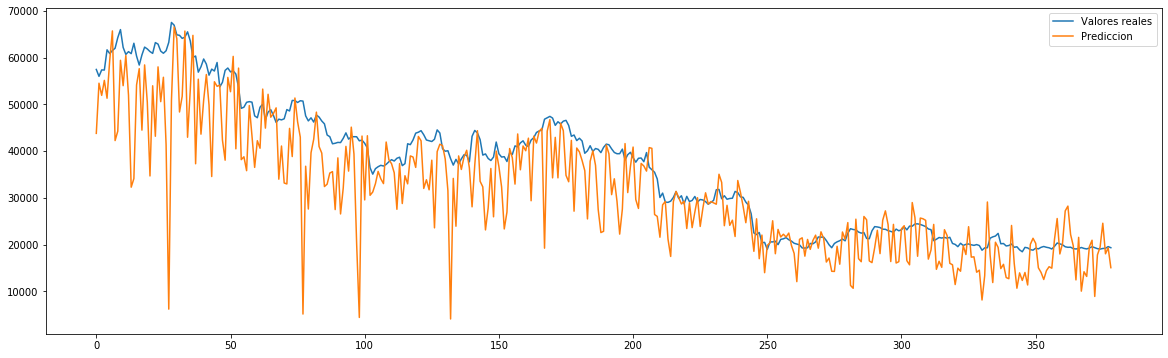

In [78]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [79]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 6155.410764140831
R-cuadrado: 0.5756111838366262
Tasa de acierto de subida: 0.48148148148148145


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [80]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX1, trainy1, epochs=100)
 

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_75 (LSTM)              (None, 11, 100)           40800     
                                                                 
 lstm_76 (LSTM)              (None, 11, 50)            30200     
                                                                 
 lstm_77 (LSTM)              (None, 11, 33)            11088     
                                                                 
 lstm_78 (LSTM)              (None, 11, 25)            5900      
                                                                 
 lstm_79 (LSTM)              (None, 11, 20)            3680      
                                                                 
 lstm_80 (LSTM)              (None, 11, 17)            2584      
                                                                 
 lstm_81 (LSTM)              (None, 11, 14)          

In [81]:
y_predLSTM100 = modelLSTM100.predict(testX1)

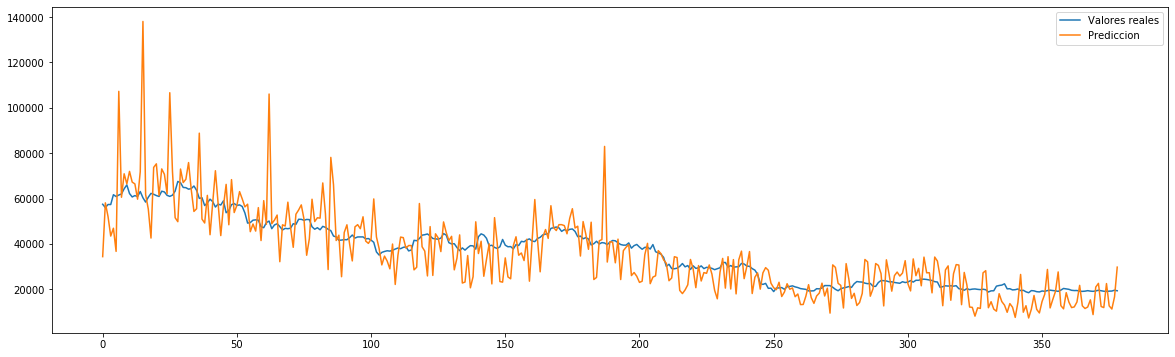

In [82]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [83]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM100))
print("R-cuadrado:", r2_score(testy1, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 7376.306007894954
R-cuadrado: 0.42751227099923483
Tasa de acierto de subida: 0.42592592592592593


Modelo 64 neuronas:

In [84]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX1, trainy1, epochs=100)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_84 (LSTM)              (None, 11, 64)            16896     
                                                                 
 lstm_85 (LSTM)              (None, 11, 32)            12416     
                                                                 
 lstm_86 (LSTM)              (None, 11, 21)            4536      
                                                                 
 lstm_87 (LSTM)              (None, 11, 16)            2432      
                                                                 
 lstm_88 (LSTM)              (None, 11, 13)            1560      
                                                                 
 lstm_89 (LSTM)              (None, 11, 11)            1100      
                                                                 
 lstm_90 (LSTM)              (None, 11, 9)           

48/48 [==============================] - 2s 35ms/step - loss: 11807.5352 - mae: 11807.5352
Epoch 64/100
48/48 [==============================] - 2s 34ms/step - loss: 11206.0537 - mae: 11206.0537
Epoch 65/100
48/48 [==============================] - 2s 33ms/step - loss: 10301.2217 - mae: 10301.2217
Epoch 66/100
48/48 [==============================] - 2s 33ms/step - loss: 9285.2744 - mae: 9285.2744
Epoch 67/100
48/48 [==============================] - 2s 33ms/step - loss: 7538.4351 - mae: 7538.4351
Epoch 68/100
48/48 [==============================] - 2s 33ms/step - loss: 5906.3564 - mae: 5906.3564
Epoch 69/100
48/48 [==============================] - 2s 33ms/step - loss: 4344.9106 - mae: 4344.9106
Epoch 70/100
48/48 [==============================] - 2s 34ms/step - loss: 3113.5476 - mae: 3113.5476
Epoch 71/100
48/48 [==============================] - 2s 35ms/step - loss: 2836.6748 - mae: 2836.6748
Epoch 72/100
48/48 [==============================] - 2s 34ms/step - loss: 2614.3765 - ma

In [85]:
y_predLSTM64 = modelLSTM64.predict(testX1)

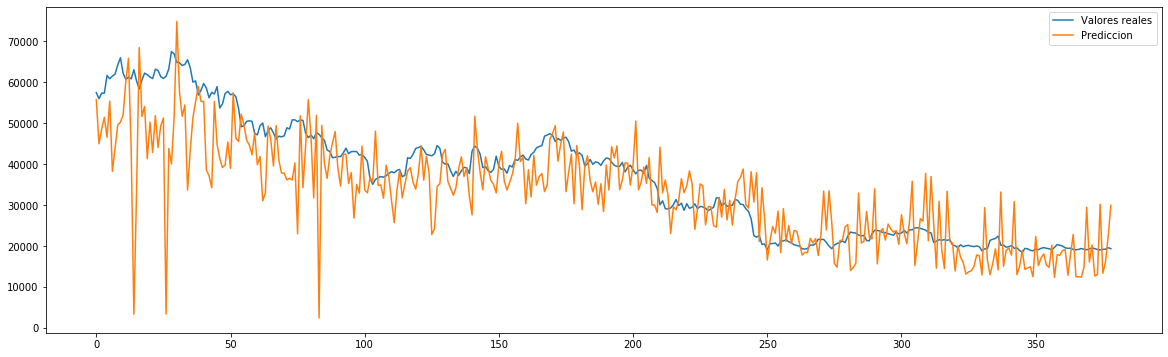

In [86]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [87]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM64))
print("R-cuadrado:", r2_score(testy1, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 6523.096016398004
R-cuadrado: 0.5390801071606507
Tasa de acierto de subida: 0.48677248677248675


Modelo 32 neuronas:

In [88]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX1, trainy1, epochs=100)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_93 (LSTM)              (None, 11, 32)            4352      
                                                                 
 lstm_94 (LSTM)              (None, 11, 16)            3136      
                                                                 
 lstm_95 (LSTM)              (None, 11, 11)            1232      
                                                                 
 lstm_96 (LSTM)              (None, 11, 8)             640       
                                                                 
 lstm_97 (LSTM)              (None, 11, 6)             360       
                                                                 
 lstm_98 (LSTM)              (None, 11, 5)             240       
                                                                 
 lstm_99 (LSTM)              (None, 11, 5)           

48/48 [==============================] - 1s 29ms/step - loss: 15342.6738 - mae: 15342.6738
Epoch 64/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6777 - mae: 15342.6777
Epoch 65/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6797 - mae: 15342.6797
Epoch 66/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6777 - mae: 15342.6777
Epoch 67/100
48/48 [==============================] - 1s 31ms/step - loss: 15342.6758 - mae: 15342.6758
Epoch 68/100
48/48 [==============================] - 1s 30ms/step - loss: 15342.6768 - mae: 15342.6768
Epoch 69/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6738 - mae: 15342.6738
Epoch 70/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6758 - mae: 15342.6758
Epoch 71/100
48/48 [==============================] - 1s 29ms/step - loss: 15342.6729 - mae: 15342.6729
Epoch 72/100
48/48 [==============================] - 1s 29ms/step - loss: 15

In [89]:
y_predLSTM32 = modelLSTM32.predict(testX1)

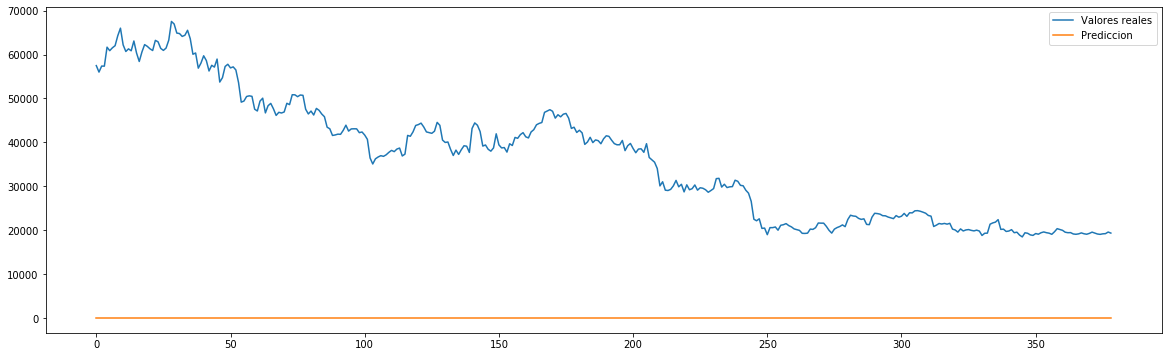

In [90]:
plt.figure(figsize = (20,6))
plt.plot(testy1.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [91]:
test1 =subida(testy1)
pred1 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy1, y_predLSTM32))
print("R-cuadrado:", r2_score(testy1, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test1,pred1))

Error Absoluto Medio: 36189.566912928756
R-cuadrado: -6.683992517505192
Tasa de acierto de subida: 0.5343915343915344


# CONJUNTO DE DATOS 2

In [6]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [7]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [8]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(21, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [95]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_102 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_103 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_104 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_105 (LSTM)             (None, 25)                5900      
                                                                 
 dense_18 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [96]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 8s 41ms/step - loss: 15899.5791
Epoch 2/100
46/46 [==============================] - 2s 41ms/step - loss: 14514.5176
Epoch 3/100
46/46 [==============================] - 2s 41ms/step - loss: 11039.4863
Epoch 4/100
46/46 [==============================] - 2s 41ms/step - loss: 10651.2539
Epoch 5/100
46/46 [==============================] - 2s 41ms/step - loss: 8328.0215
Epoch 6/100
46/46 [==============================] - 2s 41ms/step - loss: 8238.3408
Epoch 7/100
46/46 [==============================] - 2s 41ms/step - loss: 8857.6406
Epoch 8/100
46/46 [==============================] - 2s 41ms/step - loss: 7838.1191
Epoch 9/100
46/46 [==============================] - 2s 42ms/step - loss: 7249.1812
Epoch 10/100
46/46 [==============================] - 2s 42ms/step - loss: 8689.7012
Epoch 11/100
46/46 [==============================] - 2s 41ms/step - loss: 8240.6689
Epoch 12/100
46/46 [==============================] - 2s 41ms/step - l

In [97]:
y_predLSTM100 = modelLSTM100.predict(testX2)

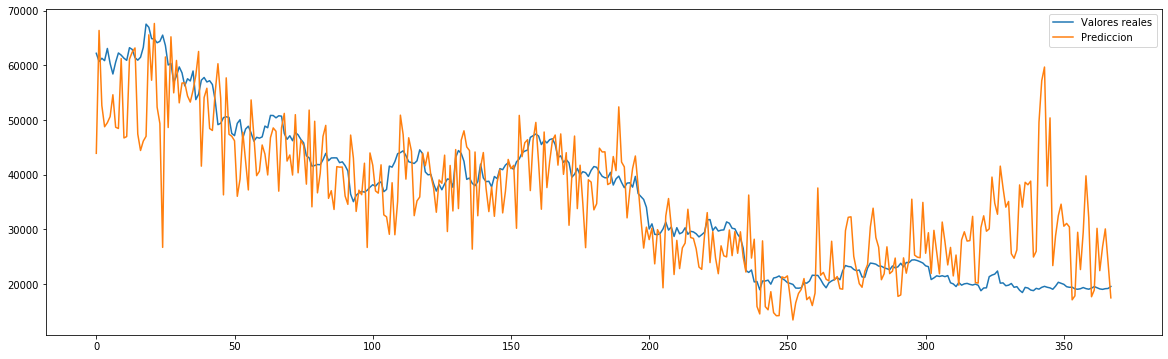

In [98]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [99]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 5963.491315599525
R-cuadrado: 0.6197861208331832
Tasa de acierto de subida: 0.5122615803814714


Modelo 64 neuronas

In [100]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_106 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_107 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_108 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_109 (LSTM)             (None, 16)                2432      
                                                                 
 dense_19 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [101]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 7s 44ms/step - loss: 18727.9219
Epoch 2/100
46/46 [==============================] - 2s 42ms/step - loss: 11866.0342
Epoch 3/100
46/46 [==============================] - 2s 40ms/step - loss: 9693.0020
Epoch 4/100
46/46 [==============================] - 2s 42ms/step - loss: 8287.9160
Epoch 5/100
46/46 [==============================] - 2s 36ms/step - loss: 7044.1558
Epoch 6/100
46/46 [==============================] - 2s 36ms/step - loss: 6277.5581
Epoch 7/100
46/46 [==============================] - 2s 37ms/step - loss: 4801.6147
Epoch 8/100
46/46 [==============================] - 2s 40ms/step - loss: 3933.9250
Epoch 9/100
46/46 [==============================] - 2s 39ms/step - loss: 5276.7290
Epoch 10/100
46/46 [==============================] - 2s 35ms/step - loss: 8486.3701
Epoch 11/100
46/46 [==============================] - 2s 33ms/step - loss: 8272.4824
Epoch 12/100
46/46 [==============================] - 2s 33ms/step - los

In [102]:
y_predLSTM64 = modelLSTM64.predict(testX2)

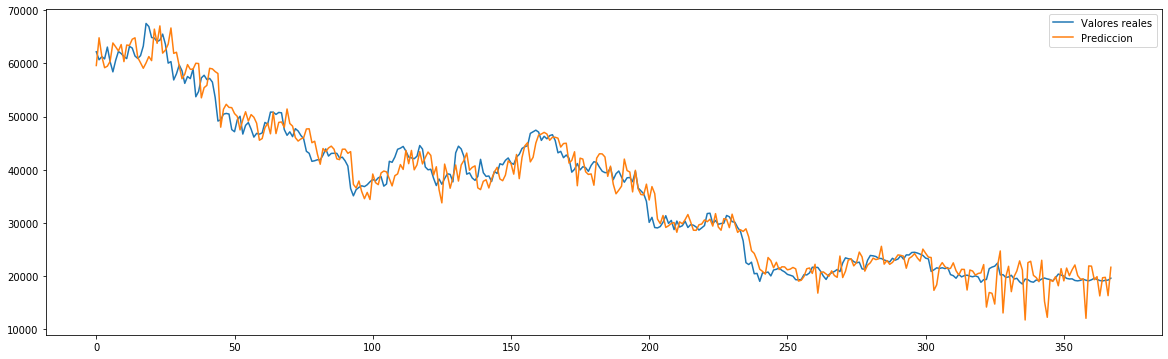

In [103]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [104]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,y_predLSTM64))

Error Absoluto Medio: 1942.3044383704141
R-cuadrado: 0.9640889904961263
Tasa de acierto de subida: 0.0


Modelo 32 neuronas:

In [105]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_110 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_111 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_112 (LSTM)             (None, 21, 11)            1232      
                                                                 
 lstm_113 (LSTM)             (None, 8)                 640       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [106]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 11s 35ms/step - loss: 15758.6182
Epoch 2/100
46/46 [==============================] - 1s 30ms/step - loss: 12907.6973
Epoch 3/100
46/46 [==============================] - 1s 29ms/step - loss: 16045.0781
Epoch 4/100
46/46 [==============================] - 1s 32ms/step - loss: 13057.7939
Epoch 5/100
46/46 [==============================] - 2s 33ms/step - loss: 12148.5596
Epoch 6/100
46/46 [==============================] - 1s 31ms/step - loss: 10677.0586
Epoch 7/100
46/46 [==============================] - 1s 32ms/step - loss: 12012.5771
Epoch 8/100
46/46 [==============================] - 1s 32ms/step - loss: 12989.5928
Epoch 9/100
46/46 [==============================] - 1s 30ms/step - loss: 9666.2393
Epoch 10/100
46/46 [==============================] - 1s 32ms/step - loss: 7565.5601
Epoch 11/100
46/46 [==============================] - 2s 35ms/step - loss: 6486.6724
Epoch 12/100
46/46 [==============================] - 2s 35ms/ste

In [107]:
y_predLSTM32 = modelLSTM32.predict(testX2)

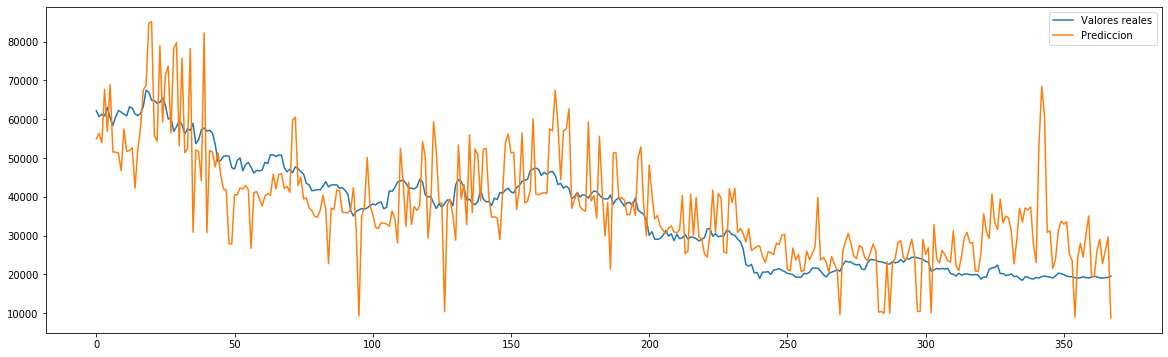

In [108]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [109]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 7728.770013799253
R-cuadrado: 0.44536781984745943
Tasa de acierto de subida: 0.47411444141689374


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [110]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_115 (LSTM)             (None, 21, 100)           80400     
                                                                 
 lstm_116 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_117 (LSTM)             (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [111]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 10s 55ms/step - loss: 10437.7754 - mae: 10437.7754
Epoch 2/100
46/46 [==============================] - 2s 50ms/step - loss: 8792.5908 - mae: 8792.5908
Epoch 3/100
46/46 [==============================] - 2s 53ms/step - loss: 7882.7339 - mae: 7882.7339
Epoch 4/100
46/46 [==============================] - 3s 58ms/step - loss: 9193.1992 - mae: 9193.1992
Epoch 5/100
46/46 [==============================] - 3s 56ms/step - loss: 7603.4341 - mae: 7603.4341
Epoch 6/100
46/46 [==============================] - 2s 50ms/step - loss: 7219.1816 - mae: 7219.1816
Epoch 7/100
46/46 [==============================] - 3s 61ms/step - loss: 7340.5146 - mae: 7340.5146
Epoch 8/100
46/46 [==============================] - 2s 49ms/step - loss: 6399.3677 - mae: 6399.3677
Epoch 9/100
46/46 [==============================] - 2s 54ms/step - loss: 6147.3457 - mae: 6147.3457
Epoch 10/100
46/46 [==============================] - 3s 60ms/step - loss: 6046.9668 - m

In [112]:
y_predLSTM100 = modelLSTM100.predict(testX2)

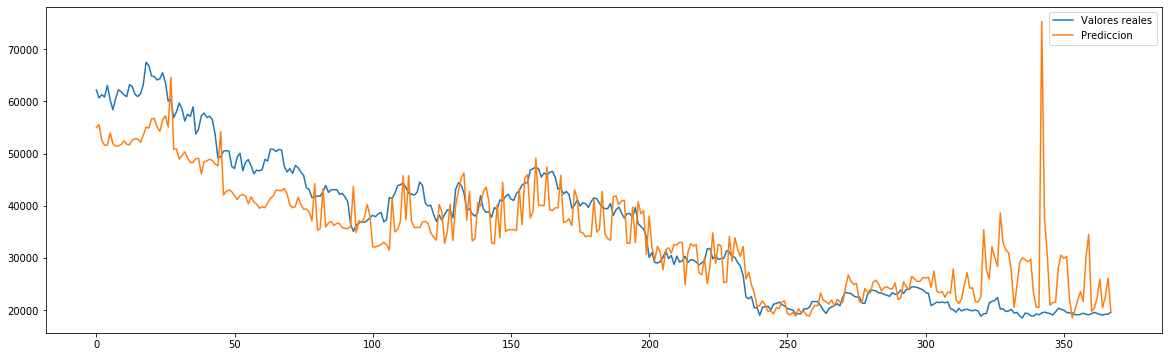

In [113]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [114]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 4825.21657757303
R-cuadrado: 0.7729394912752224
Tasa de acierto de subida: 0.4550408719346049


Modelo 64 neuronas

In [115]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_118 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_119 (LSTM)             (None, 21, 64)            33024     
                                                                 
 lstm_120 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_121 (LSTM)             (None, 32)                8320      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [116]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 10s 49ms/step - loss: 9378.9922 - mae: 9378.9922
Epoch 2/100
46/46 [==============================] - 2s 47ms/step - loss: 7328.4194 - mae: 7328.4194
Epoch 3/100
46/46 [==============================] - 2s 43ms/step - loss: 8345.1572 - mae: 8345.1572
Epoch 4/100
46/46 [==============================] - 2s 40ms/step - loss: 8453.8965 - mae: 8453.8965
Epoch 5/100
46/46 [==============================] - 2s 41ms/step - loss: 9159.4082 - mae: 9159.4082
Epoch 6/100
46/46 [==============================] - 2s 53ms/step - loss: 7232.3535 - mae: 7232.3535
Epoch 7/100
46/46 [==============================] - 3s 56ms/step - loss: 8747.9502 - mae: 8747.9502
Epoch 8/100
46/46 [==============================] - 2s 47ms/step - loss: 8280.8662 - mae: 8280.8662
Epoch 9/100
46/46 [==============================] - 2s 42ms/step - loss: 9650.8340 - mae: 9650.8340
Epoch 10/100
46/46 [==============================] - 2s 44ms/step - loss: 8191.8311 - mae

In [117]:
y_predLSTM64 = modelLSTM64.predict(testX2)

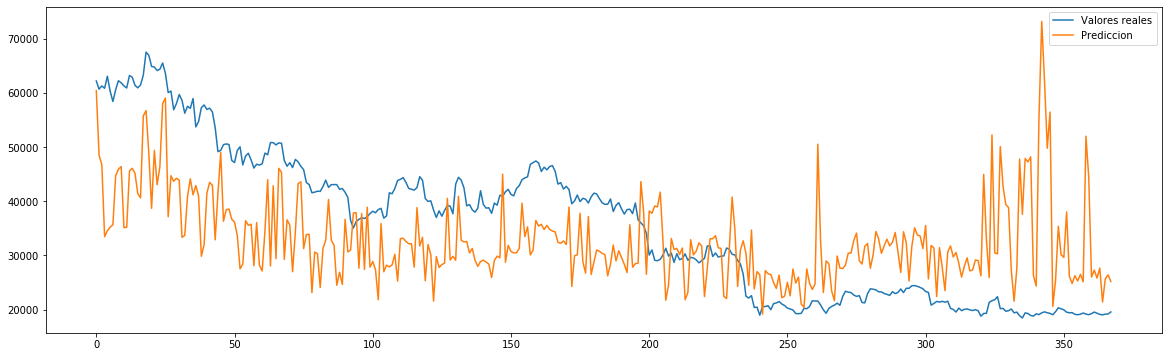

In [118]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [119]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 10726.369643766982
R-cuadrado: 0.08869786272800562
Tasa de acierto de subida: 0.5068119891008175


Modelo 32 neuronas:

In [9]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 21, 32)            4352      
                                                                 
 lstm_1 (LSTM)               (None, 21, 32)            8320      
                                                                 
 lstm_2 (LSTM)               (None, 21, 16)            3136      
                                                                 
 lstm_3 (LSTM)               (None, 16)                2112      
                                                                 
 dense (Dense)               (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [10]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
47/47 [==============================] - 84s 66ms/step - loss: 12928.5371 - mae: 12928.5371
Epoch 2/100
47/47 [==============================] - 3s 60ms/step - loss: 11957.0869 - mae: 11957.0869
Epoch 3/100
47/47 [==============================] - 3s 59ms/step - loss: 11324.7988 - mae: 11324.7988
Epoch 4/100
47/47 [==============================] - 3s 62ms/step - loss: 12948.9951 - mae: 12948.9951
Epoch 5/100
47/47 [==============================] - 3s 62ms/step - loss: 13565.1885 - mae: 13565.1885
Epoch 6/100
47/47 [==============================] - 3s 65ms/step - loss: 12340.1572 - mae: 12340.1572
Epoch 7/100
47/47 [==============================] - 3s 65ms/step - loss: 12561.1777 - mae: 12561.1777
Epoch 8/100
47/47 [==============================] - 3s 62ms/step - loss: 12281.0322 - mae: 12281.0322
Epoch 9/100
47/47 [==============================] - 3s 63ms/step - loss: 8979.8232 - mae: 8979.8232
Epoch 10/100
47/47 [==============================] - 3s 64ms/step - loss:

In [11]:
y_predLSTM32 = modelLSTM32.predict(testX2)

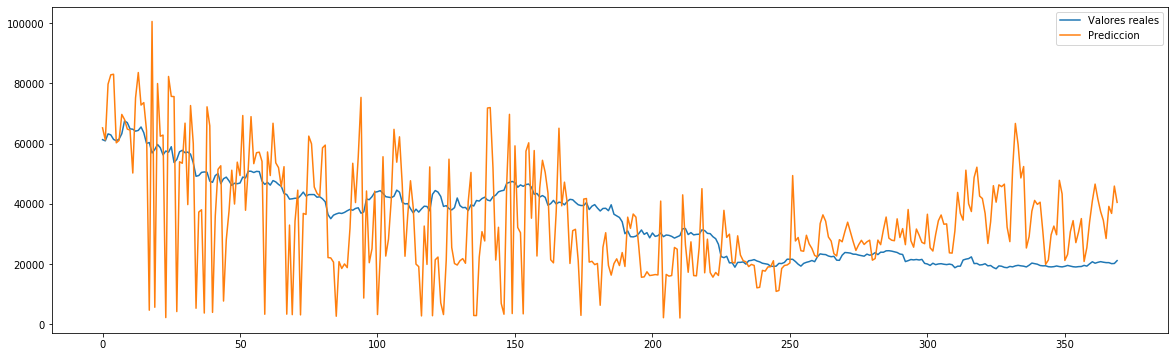

In [12]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [13]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 13785.5514708087
R-cuadrado: -0.8452952271532315
Tasa de acierto de subida: 0.5040650406504065


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [123]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_126 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_127 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_128 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_129 (LSTM)             (None, 21, 25)            5900      
                                                                 
 lstm_130 (LSTM)             (None, 21, 20)            3680      
                                                                 
 lstm_131 (LSTM)             (None, 21, 17)            2584      
                                                                 
 lstm_132 (LSTM)             (None, 21, 14)          

46/46 [==============================] - 4s 84ms/step - loss: 2186.6121 - mae: 2186.6121
Epoch 65/100
46/46 [==============================] - 4s 96ms/step - loss: 1905.9124 - mae: 1905.9124
Epoch 66/100
46/46 [==============================] - 5s 108ms/step - loss: 1737.4476 - mae: 1737.4476
Epoch 67/100
46/46 [==============================] - 4s 78ms/step - loss: 1969.8412 - mae: 1969.8412
Epoch 68/100
46/46 [==============================] - 4s 89ms/step - loss: 2582.9355 - mae: 2582.9355
Epoch 69/100
46/46 [==============================] - 3s 73ms/step - loss: 1963.7456 - mae: 1963.7456
Epoch 70/100
46/46 [==============================] - 4s 86ms/step - loss: 1850.2413 - mae: 1850.2413
Epoch 71/100
46/46 [==============================] - 4s 78ms/step - loss: 2100.2981 - mae: 2100.2981
Epoch 72/100
46/46 [==============================] - 4s 85ms/step - loss: 2725.2192 - mae: 2725.2192
Epoch 73/100
46/46 [==============================] - 4s 78ms/step - loss: 1766.7384 - mae: 17

In [124]:
y_predLSTM100 = modelLSTM100.predict(testX2)

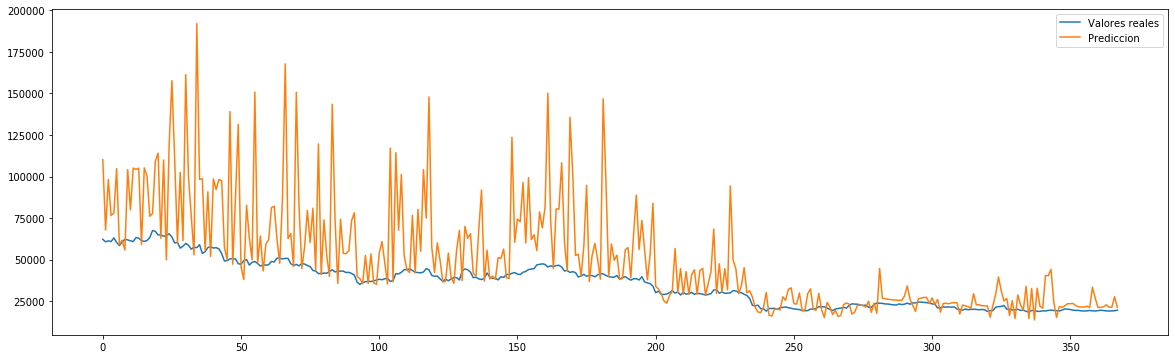

In [125]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [126]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 16804.46060260275
R-cuadrado: -3.4449719619819934
Tasa de acierto de subida: 0.46866485013623976


Modelo 64 neuronas:

In [127]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX2, trainy2, epochs=100)

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_135 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_136 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_137 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_138 (LSTM)             (None, 21, 16)            2432      
                                                                 
 lstm_139 (LSTM)             (None, 21, 13)            1560      
                                                                 
 lstm_140 (LSTM)             (None, 21, 11)            1100      
                                                                 
 lstm_141 (LSTM)             (None, 21, 9)           

In [128]:
y_predLSTM64 = modelLSTM64.predict(testX2)

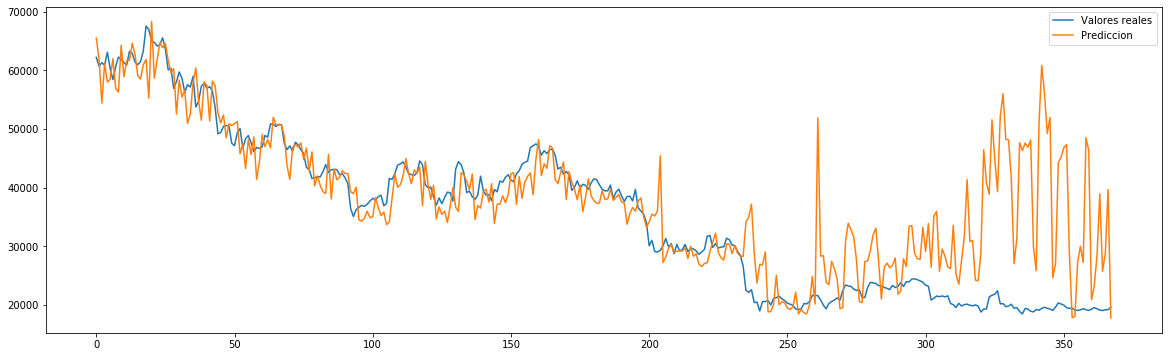

In [129]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [130]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 5443.174284986413
R-cuadrado: 0.5386171792381095
Tasa de acierto de subida: 0.4822888283378747


Modelo 32 neuronas:

In [131]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_144 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_145 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_146 (LSTM)             (None, 21, 11)            1232      
                                                                 
 lstm_147 (LSTM)             (None, 21, 8)             640       
                                                                 
 lstm_148 (LSTM)             (None, 21, 6)             360       
                                                                 
 lstm_149 (LSTM)             (None, 21, 5)             240       
                                                                 
 lstm_150 (LSTM)             (None, 21, 5)           

In [132]:
y_predLSTM32 = modelLSTM32.predict(testX2)

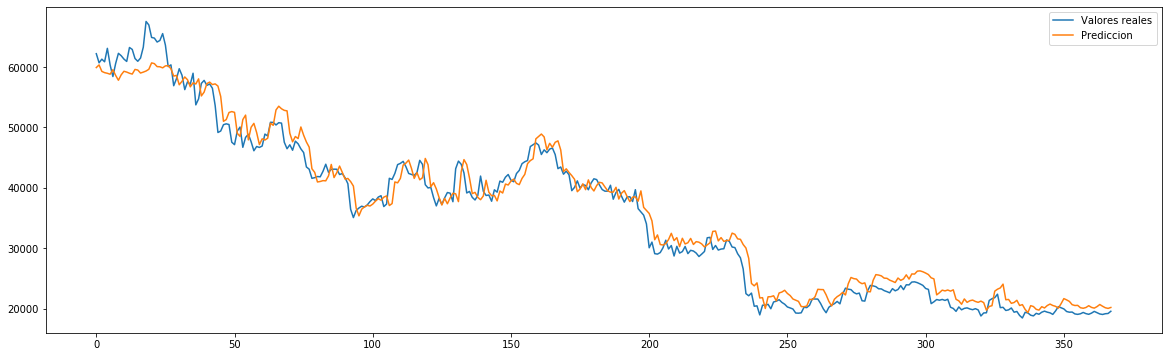

In [133]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [134]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 1803.4804577105979
R-cuadrado: 0.9713467338697616
Tasa de acierto de subida: 0.4713896457765668


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [135]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_153 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_154 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_155 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_156 (LSTM)             (None, 25)                5900      
                                                                 
 dense_27 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [136]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 21s 54ms/step - loss: 15674.1611
Epoch 2/100
46/46 [==============================] - 2s 44ms/step - loss: 15558.0625
Epoch 3/100
46/46 [==============================] - 2s 44ms/step - loss: 15243.1328
Epoch 4/100
46/46 [==============================] - 2s 50ms/step - loss: 15314.5703
Epoch 5/100
46/46 [==============================] - 3s 65ms/step - loss: 15519.3467
Epoch 6/100
46/46 [==============================] - 3s 67ms/step - loss: 14887.2227
Epoch 7/100
46/46 [==============================] - 3s 66ms/step - loss: 14770.0771
Epoch 8/100
46/46 [==============================] - 3s 55ms/step - loss: 14714.2520
Epoch 9/100
46/46 [==============================] - 2s 44ms/step - loss: 14795.2012
Epoch 10/100
46/46 [==============================] - 3s 63ms/step - loss: 14749.3877
Epoch 11/100
46/46 [==============================] - 3s 58ms/step - loss: 14597.8779
Epoch 12/100
46/46 [==============================] - 3s 55ms/

In [137]:
y_predLSTM100 = modelLSTM100.predict(testX2)

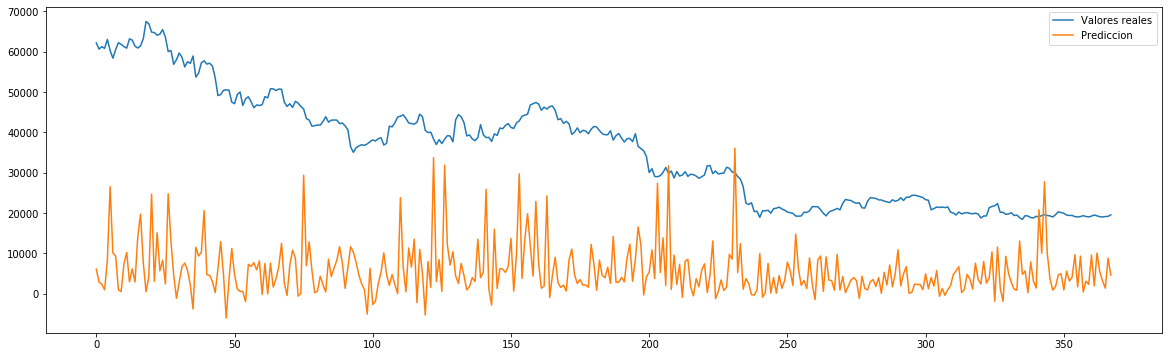

In [138]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [139]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 29890.374075582753
R-cuadrado: -4.882477995938856
Tasa de acierto de subida: 0.4768392370572207


Modelo 64 neuronas

In [140]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_157 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_158 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_159 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_160 (LSTM)             (None, 16)                2432      
                                                                 
 dense_28 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [141]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 14s 46ms/step - loss: 15421.7627
Epoch 2/100
46/46 [==============================] - 2s 41ms/step - loss: 15279.1777
Epoch 3/100
46/46 [==============================] - 2s 50ms/step - loss: 15247.9170
Epoch 4/100
46/46 [==============================] - 2s 50ms/step - loss: 15306.1172
Epoch 5/100
46/46 [==============================] - 2s 50ms/step - loss: 15261.7510
Epoch 6/100
46/46 [==============================] - 2s 47ms/step - loss: 15192.5293
Epoch 7/100
46/46 [==============================] - 2s 48ms/step - loss: 15151.9482
Epoch 8/100
46/46 [==============================] - 2s 45ms/step - loss: 15142.6621
Epoch 9/100
46/46 [==============================] - 2s 37ms/step - loss: 15022.2080
Epoch 10/100
46/46 [==============================] - 2s 33ms/step - loss: 14935.4785
Epoch 11/100
46/46 [==============================] - 2s 33ms/step - loss: 14877.0146
Epoch 12/100
46/46 [==============================] - 2s 41ms/

In [142]:
y_predLSTM64 = modelLSTM64.predict(testX2)

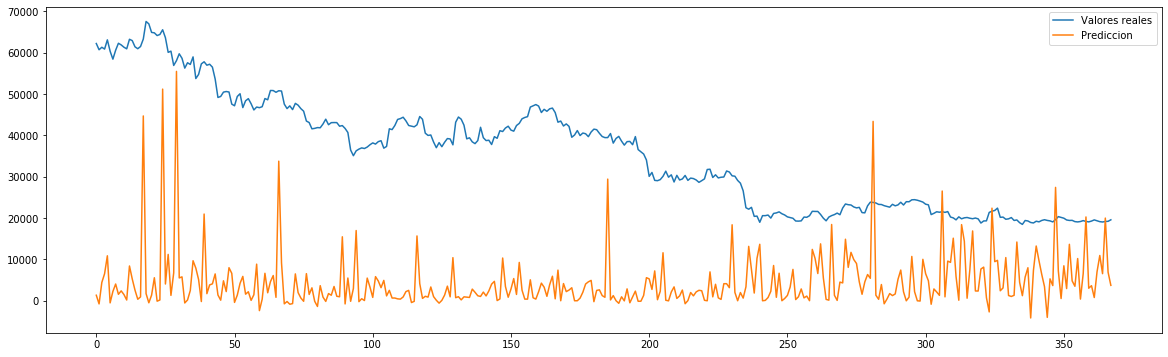

In [143]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [144]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 31312.97063141689
R-cuadrado: -5.548908014366087
Tasa de acierto de subida: 0.4877384196185286


Modelo 32 neuronas:

In [145]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_161 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_162 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_163 (LSTM)             (None, 21, 11)            1232      
                                                                 
 lstm_164 (LSTM)             (None, 8)                 640       
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [146]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 13s 31ms/step - loss: 18695.7480
Epoch 2/100
46/46 [==============================] - 1s 25ms/step - loss: 17597.1797
Epoch 3/100
46/46 [==============================] - 1s 25ms/step - loss: 16943.0371
Epoch 4/100
46/46 [==============================] - 2s 36ms/step - loss: 16682.5273
Epoch 5/100
46/46 [==============================] - 2s 42ms/step - loss: 16693.2793
Epoch 6/100
46/46 [==============================] - 2s 42ms/step - loss: 16695.1328
Epoch 7/100
46/46 [==============================] - 2s 43ms/step - loss: 16797.0195
Epoch 8/100
46/46 [==============================] - 2s 44ms/step - loss: 16698.9062
Epoch 9/100
46/46 [==============================] - 2s 39ms/step - loss: 16649.8398
Epoch 10/100
46/46 [==============================] - 2s 40ms/step - loss: 16613.0352
Epoch 11/100
46/46 [==============================] - 2s 38ms/step - loss: 16685.7676
Epoch 12/100
46/46 [==============================] - 2s 33ms/

In [147]:
y_predLSTM32 = modelLSTM32.predict(testX2)

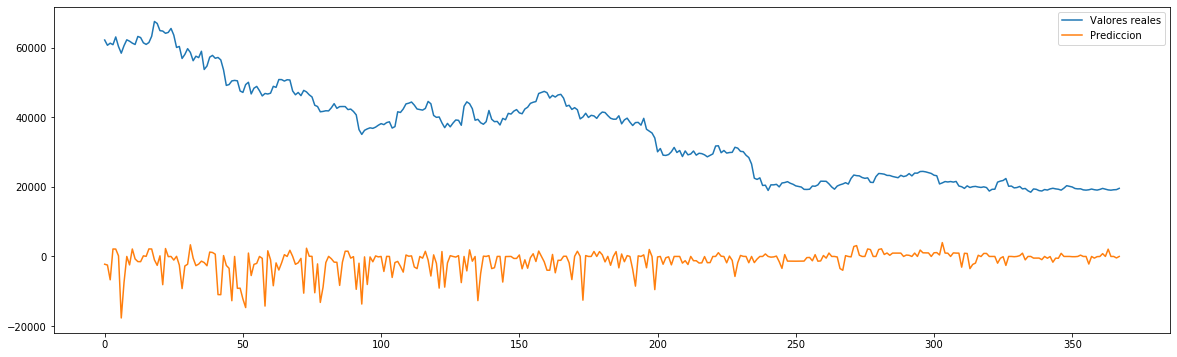

In [148]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [149]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 36880.118230769316
R-cuadrado: -7.556587085928641
Tasa de acierto de subida: 0.5286103542234333


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [150]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_165 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_166 (LSTM)             (None, 21, 100)           80400     
                                                                 
 lstm_167 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_168 (LSTM)             (None, 50)                20200     
                                                                 
 dense_30 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [151]:
modelLSTM100.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX2, testy2)

Epoch 1/100
46/46 [==============================] - 16s 85ms/step - loss: 11539.5928 - mae: 11539.5928
Epoch 2/100
46/46 [==============================] - 4s 86ms/step - loss: 10851.7930 - mae: 10851.7930
Epoch 3/100
46/46 [==============================] - 4s 85ms/step - loss: 10027.8525 - mae: 10027.8525
Epoch 4/100
46/46 [==============================] - 4s 84ms/step - loss: 10028.3027 - mae: 10028.3027
Epoch 5/100
46/46 [==============================] - 4s 90ms/step - loss: 9920.6270 - mae: 9920.6270
Epoch 6/100
46/46 [==============================] - 4s 91ms/step - loss: 9510.5195 - mae: 9510.5195
Epoch 7/100
46/46 [==============================] - 4s 87ms/step - loss: 10329.1240 - mae: 10329.1240
Epoch 8/100
46/46 [==============================] - 4s 79ms/step - loss: 10120.9668 - mae: 10120.9668
Epoch 9/100
46/46 [==============================] - 3s 55ms/step - loss: 9794.8828 - mae: 9794.8828
Epoch 10/100
46/46 [==============================] - 2s 52ms/step - loss: 919

In [152]:
y_predLSTM100 = modelLSTM100.predict(testX2)

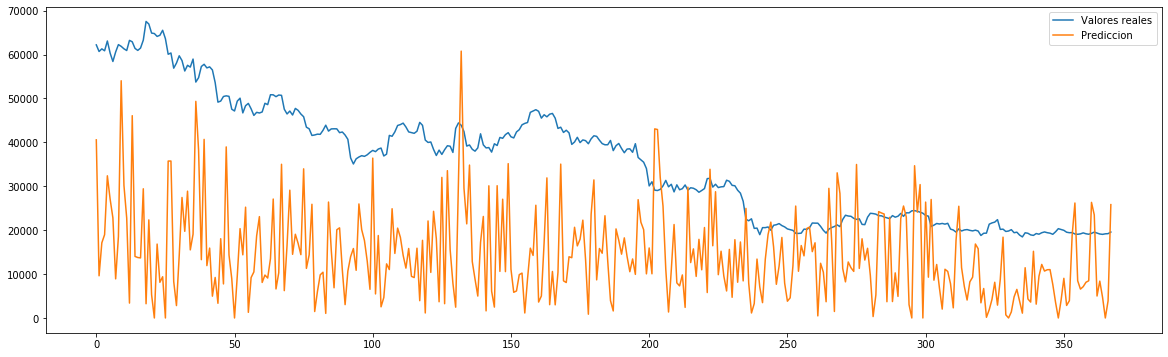

In [153]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [154]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 21995.247293533655
R-cuadrado: -2.641787358065633
Tasa de acierto de subida: 0.5068119891008175


Modelo 64 neuronas

In [155]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_169 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_170 (LSTM)             (None, 21, 64)            33024     
                                                                 
 lstm_171 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_172 (LSTM)             (None, 32)                8320      
                                                                 
 dense_31 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [156]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 14s 61ms/step - loss: 13859.6406 - mae: 13859.6406
Epoch 2/100
46/46 [==============================] - 3s 62ms/step - loss: 12224.5566 - mae: 12224.5566
Epoch 3/100
46/46 [==============================] - 3s 59ms/step - loss: 12116.0371 - mae: 12116.0371
Epoch 4/100
46/46 [==============================] - 3s 57ms/step - loss: 11158.7334 - mae: 11158.7334
Epoch 5/100
46/46 [==============================] - 3s 61ms/step - loss: 11856.3027 - mae: 11856.3027
Epoch 6/100
46/46 [==============================] - 2s 52ms/step - loss: 11878.0840 - mae: 11878.0840
Epoch 7/100
46/46 [==============================] - 2s 40ms/step - loss: 11436.2900 - mae: 11436.2900
Epoch 8/100
46/46 [==============================] - 2s 37ms/step - loss: 11825.1318 - mae: 11825.1318
Epoch 9/100
46/46 [==============================] - 2s 52ms/step - loss: 11688.5430 - mae: 11688.5430
Epoch 10/100
46/46 [==============================] - 2s 54ms/step - los

Epoch 81/100
46/46 [==============================] - 3s 54ms/step - loss: 9097.6191 - mae: 9097.6191
Epoch 82/100
46/46 [==============================] - 3s 59ms/step - loss: 8981.4600 - mae: 8981.4600
Epoch 83/100
46/46 [==============================] - 3s 55ms/step - loss: 8973.0459 - mae: 8973.0459
Epoch 84/100
46/46 [==============================] - 3s 59ms/step - loss: 9015.9971 - mae: 9015.9971
Epoch 85/100
46/46 [==============================] - 3s 57ms/step - loss: 8793.3613 - mae: 8793.3613
Epoch 86/100
46/46 [==============================] - 3s 61ms/step - loss: 8668.2168 - mae: 8668.2168
Epoch 87/100
46/46 [==============================] - 3s 63ms/step - loss: 8804.4561 - mae: 8804.4561
Epoch 88/100
46/46 [==============================] - 3s 61ms/step - loss: 9003.7969 - mae: 9003.7969
Epoch 89/100
46/46 [==============================] - 3s 57ms/step - loss: 8794.8418 - mae: 8794.8418
Epoch 90/100
46/46 [==============================] - 3s 57ms/step - loss: 8876.07

In [157]:
y_predLSTM64 = modelLSTM64.predict(testX2)

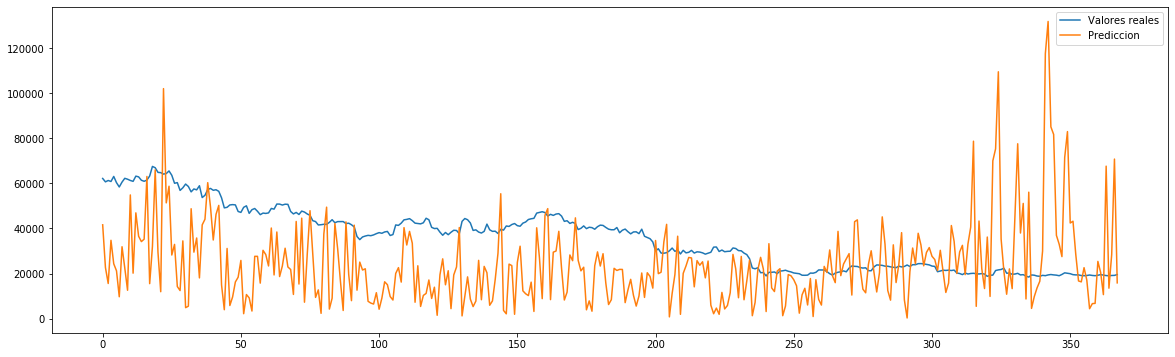

In [158]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [159]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 20097.589929822843
R-cuadrado: -2.555267051927046
Tasa de acierto de subida: 0.4986376021798365


Modelo 32 neuronas:

In [160]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_173 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_174 (LSTM)             (None, 21, 32)            8320      
                                                                 
 lstm_175 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_176 (LSTM)             (None, 16)                2112      
                                                                 
 dense_32 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [161]:
modelLSTM32.fit(trainX2, trainy2, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX2, testy2)
 

Epoch 1/100
46/46 [==============================] - 14s 42ms/step - loss: 15151.4727 - mae: 15151.4727
Epoch 2/100
46/46 [==============================] - 2s 40ms/step - loss: 14463.1543 - mae: 14463.1543
Epoch 3/100
46/46 [==============================] - 2s 42ms/step - loss: 14163.3711 - mae: 14163.3711
Epoch 4/100
46/46 [==============================] - 2s 49ms/step - loss: 13922.0068 - mae: 13922.0068
Epoch 5/100
46/46 [==============================] - 2s 47ms/step - loss: 13937.7451 - mae: 13937.7451
Epoch 6/100
46/46 [==============================] - 2s 43ms/step - loss: 13810.4805 - mae: 13810.4805
Epoch 7/100
46/46 [==============================] - 2s 46ms/step - loss: 13943.7227 - mae: 13943.7227
Epoch 8/100
46/46 [==============================] - 2s 44ms/step - loss: 14146.9131 - mae: 14146.9131
Epoch 9/100
46/46 [==============================] - 2s 44ms/step - loss: 13770.9287 - mae: 13770.9287
Epoch 10/100
46/46 [==============================] - 2s 41ms/step - los

In [162]:
y_predLSTM32 = modelLSTM32.predict(testX2)

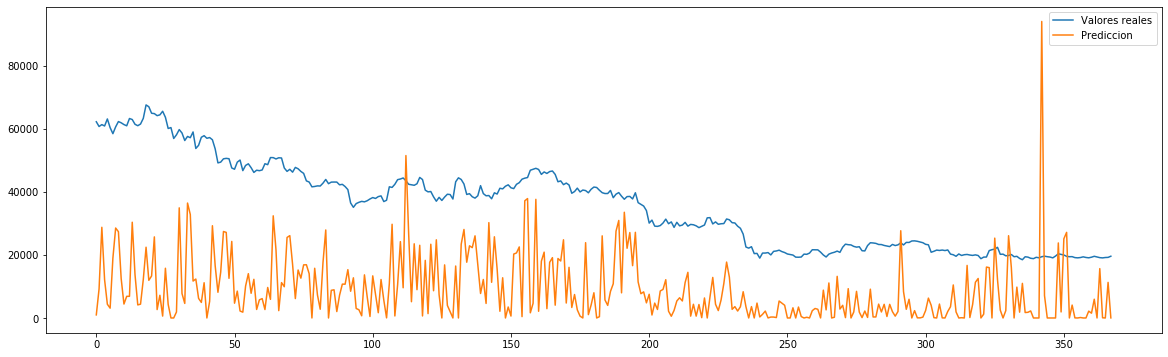

In [163]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [164]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 27054.265690751876
R-cuadrado: -3.8820470632035526
Tasa de acierto de subida: 0.5504087193460491


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [165]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX2, trainy2, epochs=100)
 

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_177 (LSTM)             (None, 21, 100)           40800     
                                                                 
 lstm_178 (LSTM)             (None, 21, 50)            30200     
                                                                 
 lstm_179 (LSTM)             (None, 21, 33)            11088     
                                                                 
 lstm_180 (LSTM)             (None, 21, 25)            5900      
                                                                 
 lstm_181 (LSTM)             (None, 21, 20)            3680      
                                                                 
 lstm_182 (LSTM)             (None, 21, 17)            2584      
                                                                 
 lstm_183 (LSTM)             (None, 21, 14)          

In [166]:
y_predLSTM100 = modelLSTM100.predict(testX2)

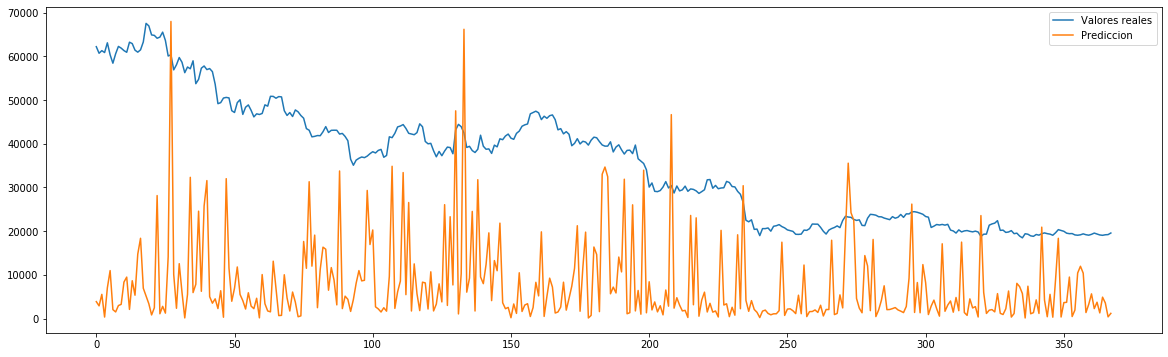

In [167]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [168]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM100))
print("R-cuadrado:", r2_score(testy2, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 28241.53695925008
R-cuadrado: -4.461708360555779
Tasa de acierto de subida: 0.5258855585831063


Modelo 64 neuronas:

In [169]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_186 (LSTM)             (None, 21, 64)            16896     
                                                                 
 lstm_187 (LSTM)             (None, 21, 32)            12416     
                                                                 
 lstm_188 (LSTM)             (None, 21, 21)            4536      
                                                                 
 lstm_189 (LSTM)             (None, 21, 16)            2432      
                                                                 
 lstm_190 (LSTM)             (None, 21, 13)            1560      
                                                                 
 lstm_191 (LSTM)             (None, 21, 11)            1100      
                                                                 
 lstm_192 (LSTM)             (None, 21, 9)           

In [170]:
modelLSTM64.fit(trainX2, trainy2, epochs=100)

Epoch 1/100
46/46 [==============================] - 28s 71ms/step - loss: 16057.2500 - mae: 16057.2500
Epoch 2/100
46/46 [==============================] - 3s 74ms/step - loss: 16055.9746 - mae: 16055.9746
Epoch 3/100
46/46 [==============================] - 4s 95ms/step - loss: 16055.2617 - mae: 16055.2617
Epoch 4/100
46/46 [==============================] - 4s 97ms/step - loss: 16054.8594 - mae: 16054.8594
Epoch 5/100
46/46 [==============================] - 4s 97ms/step - loss: 16053.4463 - mae: 16053.4463
Epoch 6/100
46/46 [==============================] - 4s 93ms/step - loss: 16051.5967 - mae: 16051.5967
Epoch 7/100
46/46 [==============================] - 5s 97ms/step - loss: 16045.0918 - mae: 16045.0918
Epoch 8/100
46/46 [==============================] - 3s 70ms/step - loss: 16043.9180 - mae: 16043.9180
Epoch 9/100
46/46 [==============================] - 4s 85ms/step - loss: 16038.2666 - mae: 16038.2666
Epoch 10/100
46/46 [==============================] - 4s 79ms/step - los

In [171]:
y_predLSTM64 = modelLSTM64.predict(testX2)

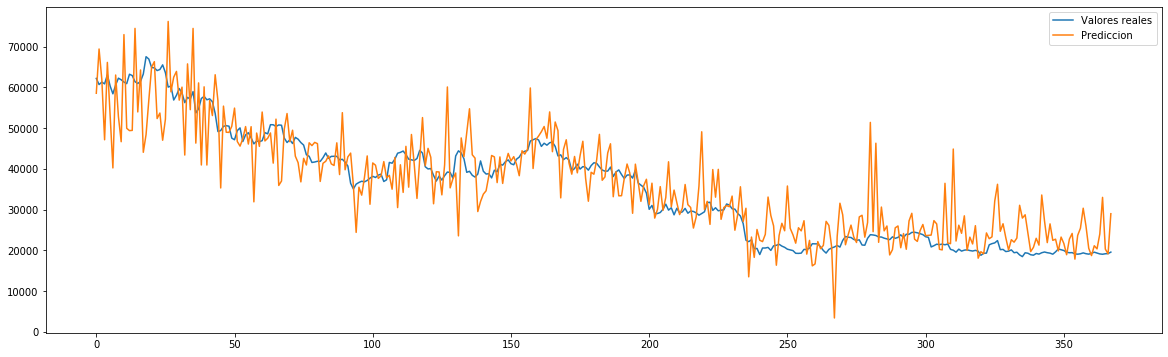

In [172]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [173]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM64))
print("R-cuadrado:", r2_score(testy2, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 4937.072500371518
R-cuadrado: 0.744380079180468
Tasa de acierto de subida: 0.5231607629427792


Modelo 32 neuronas:

In [174]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX2, trainy2, epochs=100)

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_195 (LSTM)             (None, 21, 32)            4352      
                                                                 
 lstm_196 (LSTM)             (None, 21, 16)            3136      
                                                                 
 lstm_197 (LSTM)             (None, 21, 11)            1232      
                                                                 
 lstm_198 (LSTM)             (None, 21, 8)             640       
                                                                 
 lstm_199 (LSTM)             (None, 21, 6)             360       
                                                                 
 lstm_200 (LSTM)             (None, 21, 5)             240       
                                                                 
 lstm_201 (LSTM)             (None, 21, 5)           

46/46 [==============================] - 3s 71ms/step - loss: 16053.9404 - mae: 16053.9404
Epoch 64/100
46/46 [==============================] - 3s 71ms/step - loss: 16053.6729 - mae: 16053.6729
Epoch 65/100
46/46 [==============================] - 3s 70ms/step - loss: 16053.5752 - mae: 16053.5752
Epoch 66/100
46/46 [==============================] - 3s 58ms/step - loss: 16054.1621 - mae: 16054.1621
Epoch 67/100
46/46 [==============================] - 3s 74ms/step - loss: 16053.8779 - mae: 16053.8779
Epoch 68/100
46/46 [==============================] - 3s 72ms/step - loss: 16053.4404 - mae: 16053.4404
Epoch 69/100
46/46 [==============================] - 3s 63ms/step - loss: 16053.2090 - mae: 16053.2090
Epoch 70/100
46/46 [==============================] - 3s 71ms/step - loss: 16052.6670 - mae: 16052.6670
Epoch 71/100
46/46 [==============================] - 4s 80ms/step - loss: 16052.4287 - mae: 16052.4287
Epoch 72/100
46/46 [==============================] - 4s 77ms/step - loss: 16

In [175]:
y_predLSTM32 = modelLSTM32.predict(testX2)

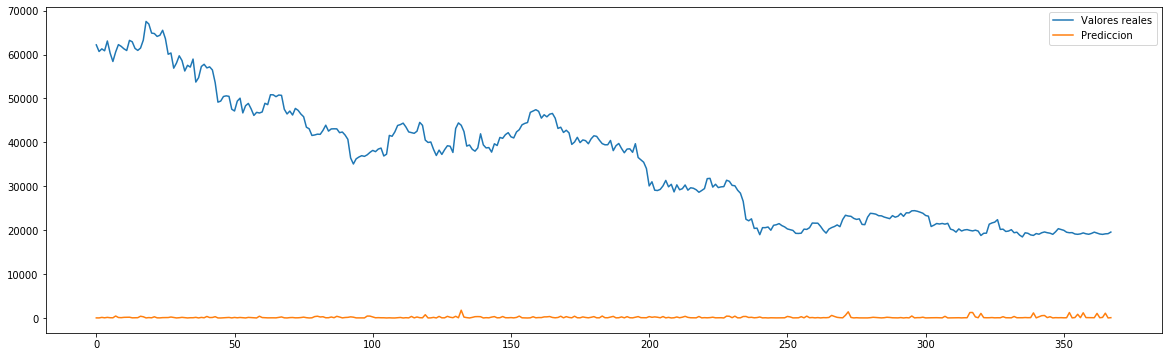

In [176]:
plt.figure(figsize = (20,6))
plt.plot(testy2.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [177]:
test2 =subida(testy2)
pred2 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy2, y_predLSTM32))
print("R-cuadrado:", r2_score(testy2, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test2,pred2))

Error Absoluto Medio: 35417.584983232904
R-cuadrado: -6.807613923130783
Tasa de acierto de subida: 0.5068119891008175


# CONJUNTO DE DATOS 3

In [178]:
def build_model1(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun))
    model.add(Dense(1))
    model.compile(optimizer=optimizer_fun, loss=loss_fun)
    return model

In [179]:
def build_model2(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

In [212]:
def build_model3(neurons, output_size, activation_fun,loss_fun,optimizer_fun):
    model = Sequential()
    model.add(LSTM(neurons, activation=activation_fun, return_sequences=True, input_shape=(35, 1)))
    model.add(LSTM(int(round(neurons/2)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/3)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/4)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/5)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/6)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/7)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/8)), activation=activation_fun, return_sequences=True))
    model.add(LSTM(int(round(neurons/9)), activation=activation_fun))
    model.add(Dense(1, activation=activation_fun))
    model.compile(loss=loss_fun, optimizer=optimizer_fun, metrics=['mae'])
    return model

### LSTM RELU+ADAM

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [181]:
modelLSTM100 = build_model1(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_204 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_205 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_206 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_207 (LSTM)             (None, 25)                5900      
                                                                 
 dense_36 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [182]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 12s 67ms/step - loss: 10745.1377
Epoch 2/100
46/46 [==============================] - 3s 66ms/step - loss: 9281.1602
Epoch 3/100
46/46 [==============================] - 3s 66ms/step - loss: 9562.4561
Epoch 4/100
46/46 [==============================] - 3s 65ms/step - loss: 9508.9014
Epoch 5/100
46/46 [==============================] - 4s 76ms/step - loss: 7703.4370
Epoch 6/100
46/46 [==============================] - 3s 72ms/step - loss: 6953.0337
Epoch 7/100
46/46 [==============================] - 3s 66ms/step - loss: 6283.7803
Epoch 8/100
46/46 [==============================] - 3s 66ms/step - loss: 5774.6826
Epoch 9/100
46/46 [==============================] - 3s 63ms/step - loss: 7448.5684
Epoch 10/100
46/46 [==============================] - 3s 64ms/step - loss: 8074.0063
Epoch 11/100
46/46 [==============================] - 3s 65ms/step - loss: 8776.3477
Epoch 12/100
46/46 [==============================] - 3s 68ms/step - los

In [183]:
y_predLSTM100 = modelLSTM100.predict(testX3)

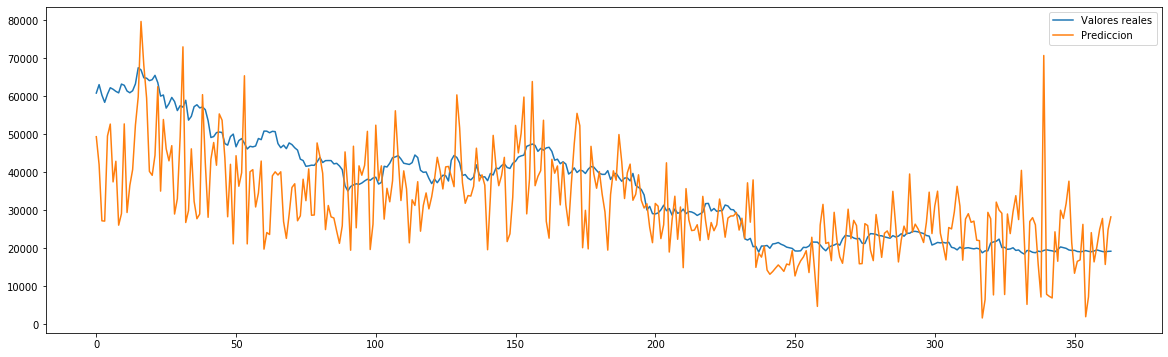

In [184]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [185]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 8966.60805709671
R-cuadrado: 0.22410119156974473
Tasa de acierto de subida: 0.4931129476584022


Modelo 64 neuronas

In [186]:
modelLSTM64 = build_model1(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_208 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_209 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_210 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_211 (LSTM)             (None, 16)                2432      
                                                                 
 dense_37 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [187]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 14s 49ms/step - loss: 13169.3926
Epoch 2/100
46/46 [==============================] - 2s 49ms/step - loss: 8350.1221
Epoch 3/100
46/46 [==============================] - 2s 49ms/step - loss: 7300.7715
Epoch 4/100
46/46 [==============================] - 2s 49ms/step - loss: 6325.4438
Epoch 5/100
46/46 [==============================] - 2s 50ms/step - loss: 5533.2598
Epoch 6/100
46/46 [==============================] - 2s 49ms/step - loss: 4750.0146
Epoch 7/100
46/46 [==============================] - 2s 49ms/step - loss: 8064.5781
Epoch 8/100
46/46 [==============================] - 2s 49ms/step - loss: 5619.1494
Epoch 9/100
46/46 [==============================] - 2s 49ms/step - loss: 7577.3145
Epoch 10/100
46/46 [==============================] - 2s 49ms/step - loss: 13046.1650
Epoch 11/100
46/46 [==============================] - 2s 49ms/step - loss: 13112.2109
Epoch 12/100
46/46 [==============================] - 2s 50ms/step - l

In [188]:
y_predLSTM64 = modelLSTM64.predict(testX3)

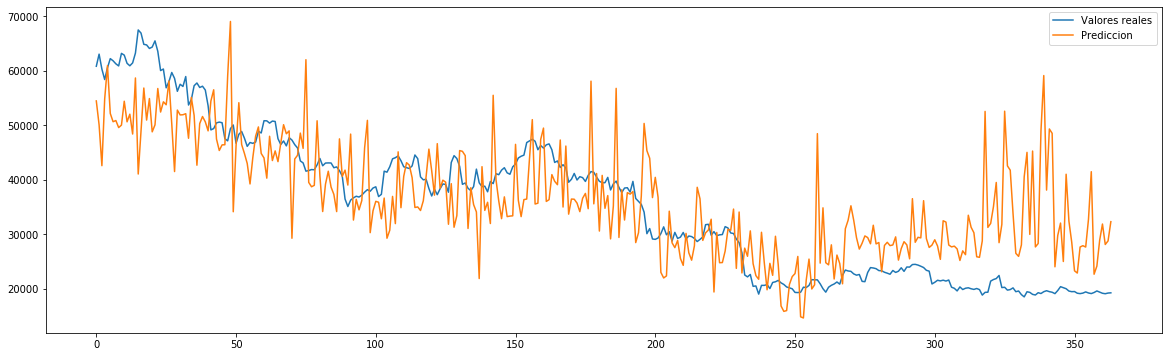

In [189]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [190]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,y_predLSTM64))

Error Absoluto Medio: 7200.482697780735
R-cuadrado: 0.5123782896544539
Tasa de acierto de subida: 0.0


Modelo 32 neuronas:

In [191]:
modelLSTM32 = build_model1(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_212 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_213 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_214 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_215 (LSTM)             (None, 8)                 640       
                                                                 
 dense_38 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [192]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 6s 37ms/step - loss: 16275.3506
Epoch 2/100
46/46 [==============================] - 2s 38ms/step - loss: 15969.5928
Epoch 3/100
46/46 [==============================] - 2s 38ms/step - loss: 15549.3994
Epoch 4/100
46/46 [==============================] - 2s 36ms/step - loss: 14277.7822
Epoch 5/100
46/46 [==============================] - 2s 36ms/step - loss: 12169.1104
Epoch 6/100
46/46 [==============================] - 2s 38ms/step - loss: 14448.6309
Epoch 7/100
46/46 [==============================] - 2s 37ms/step - loss: 8896.8721
Epoch 8/100
46/46 [==============================] - 2s 37ms/step - loss: 7931.0112
Epoch 9/100
46/46 [==============================] - 2s 36ms/step - loss: 8736.0928
Epoch 10/100
46/46 [==============================] - 2s 37ms/step - loss: 8798.6699
Epoch 11/100
46/46 [==============================] - 2s 37ms/step - loss: 6738.1631
Epoch 12/100
46/46 [==============================] - 2s 36ms/step -

46/46 [==============================] - 2s 36ms/step - loss: 2822.0364
Epoch 98/100
46/46 [==============================] - 2s 36ms/step - loss: 2489.2444
Epoch 99/100
46/46 [==============================] - 2s 36ms/step - loss: 2647.7573
Epoch 100/100
12/12 [==============================] - 1s 13ms/step - loss: 8150.0962


In [193]:
y_predLSTM32 = modelLSTM32.predict(testX3)

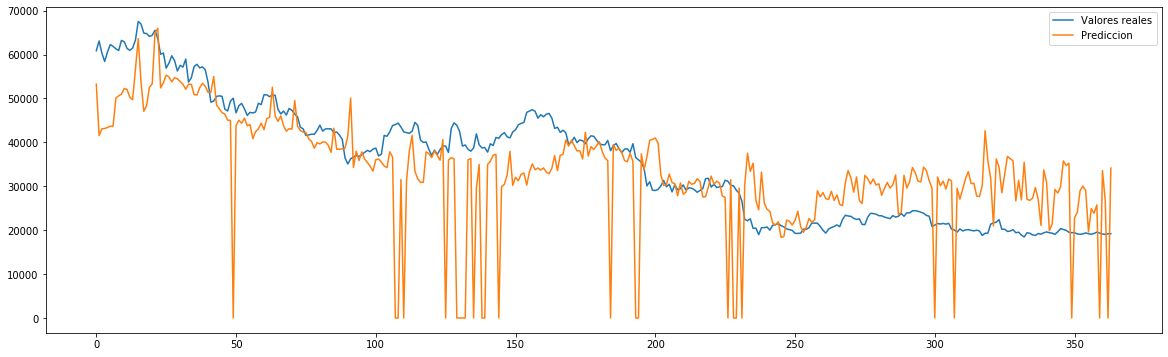

In [194]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [195]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 8150.095854969418
R-cuadrado: 0.19354695767391372
Tasa de acierto de subida: 0.46005509641873277


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

Modelo 100 neuronas:

In [196]:
modelLSTM100 = build_model2(100,1,'relu','mae','adam')
modelLSTM100.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_216 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_217 (LSTM)             (None, 35, 100)           80400     
                                                                 
 lstm_218 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_219 (LSTM)             (None, 50)                20200     
                                                                 
 dense_39 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [197]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 8s 74ms/step - loss: 13613.2227 - mae: 13613.2227
Epoch 2/100
46/46 [==============================] - 3s 75ms/step - loss: 13052.5254 - mae: 13052.5254
Epoch 3/100
46/46 [==============================] - 3s 73ms/step - loss: 12397.2568 - mae: 12397.2568
Epoch 4/100
46/46 [==============================] - 3s 72ms/step - loss: 11810.3232 - mae: 11810.3232
Epoch 5/100
46/46 [==============================] - 3s 72ms/step - loss: 12962.0801 - mae: 12962.0801
Epoch 6/100
46/46 [==============================] - 3s 72ms/step - loss: 12192.5811 - mae: 12192.5811
Epoch 7/100
46/46 [==============================] - 3s 71ms/step - loss: 12443.9834 - mae: 12443.9834
Epoch 8/100
46/46 [==============================] - 3s 74ms/step - loss: 30910.4023 - mae: 30910.4023
Epoch 9/100
46/46 [==============================] - 3s 72ms/step - loss: 22664.8906 - mae: 22664.8906
Epoch 10/100
46/46 [==============================] - 3s 71ms/step - loss

In [198]:
y_predLSTM100 = modelLSTM100.predict(testX3)

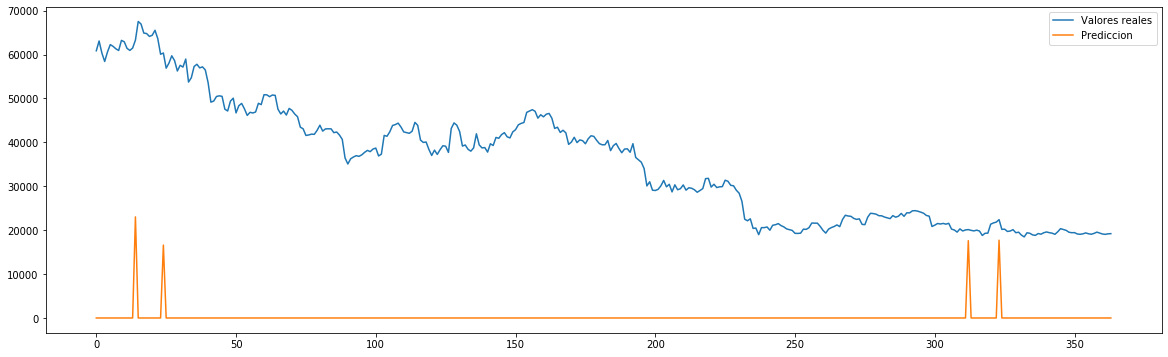

In [199]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [200]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35201.32378884787
R-cuadrado: -6.881712545876476
Tasa de acierto de subida: 0.5482093663911846


Modelo 64 neuronas

In [201]:
modelLSTM64 = build_model2(64,1,'relu','mae','adam')
modelLSTM64.summary()

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_220 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_221 (LSTM)             (None, 35, 64)            33024     
                                                                 
 lstm_222 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_223 (LSTM)             (None, 32)                8320      
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [202]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 55ms/step - loss: 14588.1016 - mae: 14588.1016
Epoch 2/100
46/46 [==============================] - 3s 55ms/step - loss: 12683.3721 - mae: 12683.3721
Epoch 3/100
46/46 [==============================] - 3s 57ms/step - loss: 15705.4092 - mae: 15705.4092
Epoch 4/100
46/46 [==============================] - 3s 55ms/step - loss: 14371.0879 - mae: 14371.0879
Epoch 5/100
46/46 [==============================] - 3s 55ms/step - loss: 12847.8252 - mae: 12847.8252
Epoch 6/100
46/46 [==============================] - 3s 55ms/step - loss: 11345.5117 - mae: 11345.5117
Epoch 7/100
46/46 [==============================] - 3s 55ms/step - loss: 10913.7754 - mae: 10913.7754
Epoch 8/100
46/46 [==============================] - 3s 55ms/step - loss: 10697.1875 - mae: 10697.1875
Epoch 9/100
46/46 [==============================] - 3s 56ms/step - loss: 11781.3477 - mae: 11781.3477
Epoch 10/100
46/46 [==============================] - 3s 55ms/step - loss

In [203]:
y_predLSTM64 = modelLSTM64.predict(testX3)

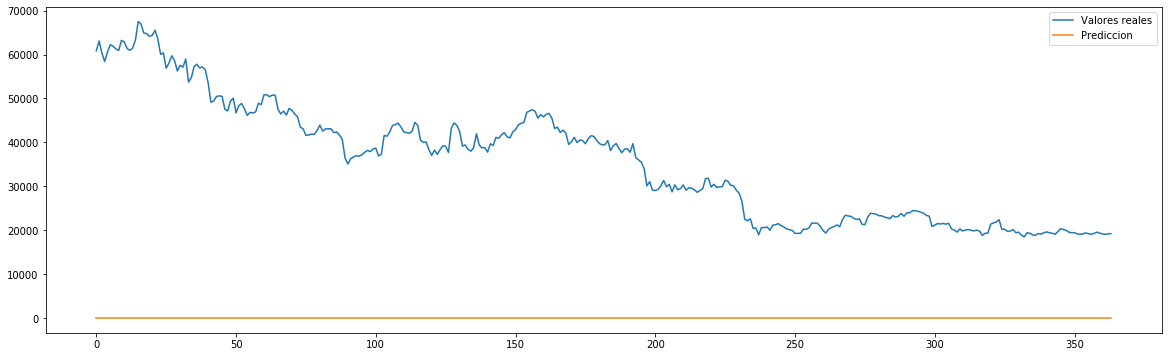

In [204]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [205]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35407.21494505495
R-cuadrado: -6.957795231228986
Tasa de acierto de subida: 0.5371900826446281


Modelo 32 neuronas:

In [206]:
modelLSTM32 = build_model2(32,1,'relu','mae','adam')
modelLSTM32.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_224 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_225 (LSTM)             (None, 35, 32)            8320      
                                                                 
 lstm_226 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_227 (LSTM)             (None, 16)                2112      
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [207]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 39ms/step - loss: 15916.2656 - mae: 15916.2656
Epoch 2/100
46/46 [==============================] - 2s 41ms/step - loss: 15871.2236 - mae: 15871.2236
Epoch 3/100
46/46 [==============================] - 2s 39ms/step - loss: 14798.8896 - mae: 14798.8896
Epoch 4/100
46/46 [==============================] - 2s 39ms/step - loss: 11136.4199 - mae: 11136.4199
Epoch 5/100
46/46 [==============================] - 2s 39ms/step - loss: 17033.8535 - mae: 17033.8535
Epoch 6/100
46/46 [==============================] - 2s 39ms/step - loss: 15578.3037 - mae: 15578.3037
Epoch 7/100
46/46 [==============================] - 2s 39ms/step - loss: 13228.2959 - mae: 13228.2959
Epoch 8/100
46/46 [==============================] - 2s 39ms/step - loss: 25159.0234 - mae: 25159.0234
Epoch 9/100
46/46 [==============================] - 2s 39ms/step - loss: 12393.0312 - mae: 12393.0312
Epoch 10/100
46/46 [==============================] - 2s 40ms/step - loss

In [208]:
y_predLSTM32 = modelLSTM32.predict(testX3)

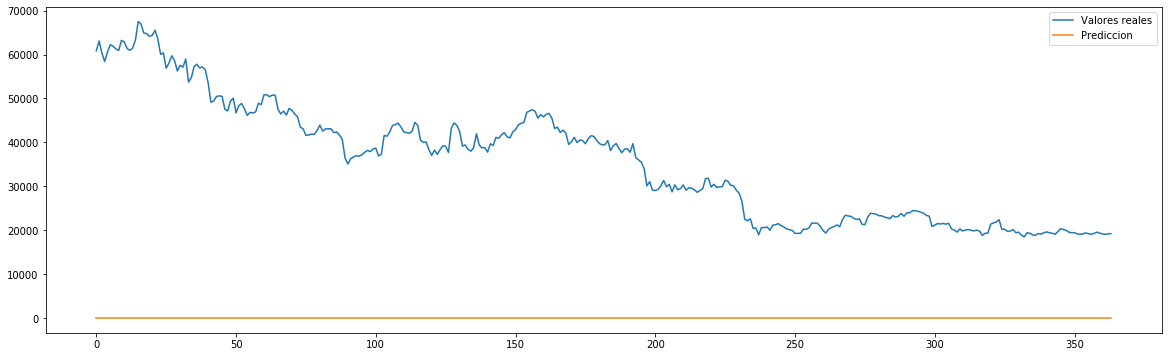

In [209]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [210]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35407.21494505495
R-cuadrado: -6.957795231228986
Tasa de acierto de subida: 0.5371900826446281


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [213]:
modelLSTM100 = build_model3(100,1,'relu','mae','adam')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_229 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_230 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_231 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_232 (LSTM)             (None, 35, 25)            5900      
                                                                 
 lstm_233 (LSTM)             (None, 35, 20)            3680      
                                                                 
 lstm_234 (LSTM)             (None, 35, 17)            2584      
                                                                 
 lstm_235 (LSTM)             (None, 35, 14)          

In [214]:
y_predLSTM100 = modelLSTM100.predict(testX3)

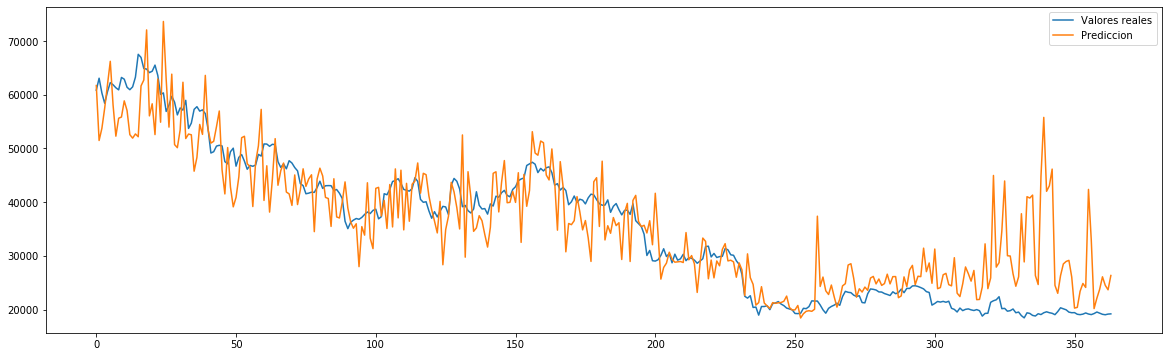

In [215]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [216]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 4763.882644445398
R-cuadrado: 0.7431471717351776
Tasa de acierto de subida: 0.4903581267217631


Modelo 64 neuronas:

In [217]:
modelLSTM64 = build_model3(64,1,'relu','mae','adam')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_238 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_239 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_240 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_241 (LSTM)             (None, 35, 16)            2432      
                                                                 
 lstm_242 (LSTM)             (None, 35, 13)            1560      
                                                                 
 lstm_243 (LSTM)             (None, 35, 11)            1100      
                                                                 
 lstm_244 (LSTM)             (None, 35, 9)           

In [218]:
y_predLSTM64 = modelLSTM64.predict(testX3)

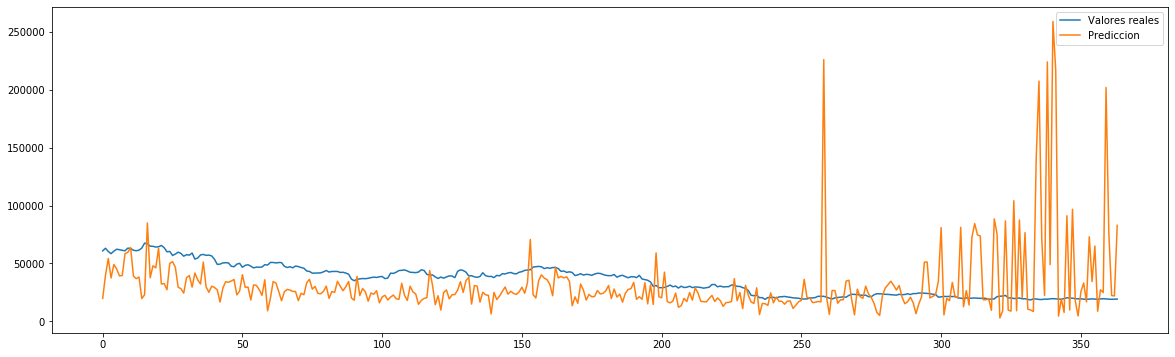

In [219]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [220]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 19593.086996158137
R-cuadrado: -5.483392399781058
Tasa de acierto de subida: 0.509641873278237


Modelo 32 neuronas:

In [221]:
modelLSTM32 = build_model3(32,1,'relu','mae','adam')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_247 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_248 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_249 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_250 (LSTM)             (None, 35, 8)             640       
                                                                 
 lstm_251 (LSTM)             (None, 35, 6)             360       
                                                                 
 lstm_252 (LSTM)             (None, 35, 5)             240       
                                                                 
 lstm_253 (LSTM)             (None, 35, 5)           

In [222]:
y_predLSTM32 = modelLSTM32.predict(testX3)

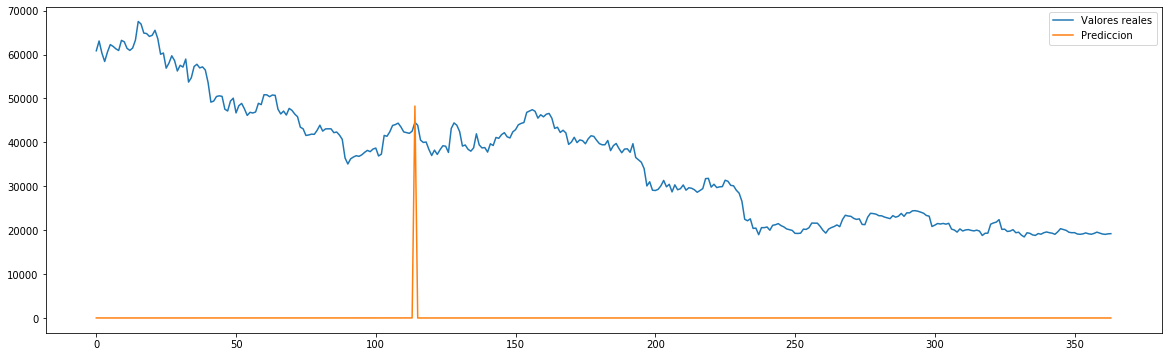

In [223]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [224]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35289.6183500893
R-cuadrado: -6.925669402637337
Tasa de acierto de subida: 0.5454545454545454


### LSTM RELU+ADAGRAD

#### EXPERIMENTO 1: Modelo con 5 capas, dividiendo las neuronas.

Modelo 100 neuronas:

In [225]:
modelLSTM100 = build_model1(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_256 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_257 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_258 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_259 (LSTM)             (None, 25)                5900      
                                                                 
 dense_45 (Dense)            (None, 1)                 26        
                                                                 
Total params: 88,014
Trainable params: 88,014
Non-trainable params: 0
_________________________________________________________________


In [226]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 8s 60ms/step - loss: 13115.9922
Epoch 2/100
46/46 [==============================] - 3s 60ms/step - loss: 12972.7666
Epoch 3/100
46/46 [==============================] - 3s 60ms/step - loss: 13240.2461
Epoch 4/100
46/46 [==============================] - 3s 62ms/step - loss: 13438.4561
Epoch 5/100
46/46 [==============================] - 3s 61ms/step - loss: 13602.8965
Epoch 6/100
46/46 [==============================] - 3s 60ms/step - loss: 13646.6934
Epoch 7/100
46/46 [==============================] - 3s 60ms/step - loss: 13427.8379
Epoch 8/100
46/46 [==============================] - 3s 60ms/step - loss: 13170.1289
Epoch 9/100
46/46 [==============================] - 3s 61ms/step - loss: 13592.6289
Epoch 10/100
46/46 [==============================] - 3s 62ms/step - loss: 13740.1680
Epoch 11/100
46/46 [==============================] - 3s 60ms/step - loss: 13439.7480
Epoch 12/100
46/46 [==============================] - 3s 60ms/s

In [227]:
y_predLSTM100 = modelLSTM100.predict(testX3)

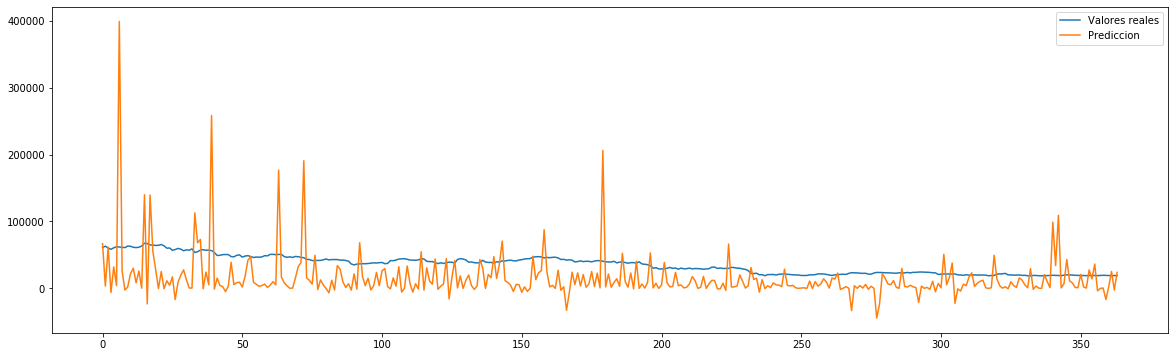

In [228]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [229]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 29860.939958360323
R-cuadrado: -7.964942748895446
Tasa de acierto de subida: 0.4931129476584022


Modelo 64 neuronas

In [230]:
modelLSTM64 = build_model1(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_260 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_261 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_262 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_263 (LSTM)             (None, 16)                2432      
                                                                 
 dense_46 (Dense)            (None, 1)                 17        
                                                                 
Total params: 36,297
Trainable params: 36,297
Non-trainable params: 0
_________________________________________________________________


In [231]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 11s 49ms/step - loss: 19451.4805
Epoch 2/100
46/46 [==============================] - 2s 49ms/step - loss: 17510.2969
Epoch 3/100
46/46 [==============================] - 2s 48ms/step - loss: 18220.8887
Epoch 4/100
46/46 [==============================] - 2s 48ms/step - loss: 17714.4707
Epoch 5/100
46/46 [==============================] - 2s 47ms/step - loss: 17554.4512
Epoch 6/100
46/46 [==============================] - 2s 49ms/step - loss: 17506.9805
Epoch 7/100
46/46 [==============================] - 2s 48ms/step - loss: 17602.1758
Epoch 8/100
46/46 [==============================] - 2s 49ms/step - loss: 17282.6777
Epoch 9/100
46/46 [==============================] - 2s 48ms/step - loss: 17733.2559
Epoch 10/100
46/46 [==============================] - 2s 48ms/step - loss: 17594.5332
Epoch 11/100
46/46 [==============================] - 2s 48ms/step - loss: 17632.8477
Epoch 12/100
46/46 [==============================] - 2s 48ms/

In [232]:
y_predLSTM64 = modelLSTM64.predict(testX3)

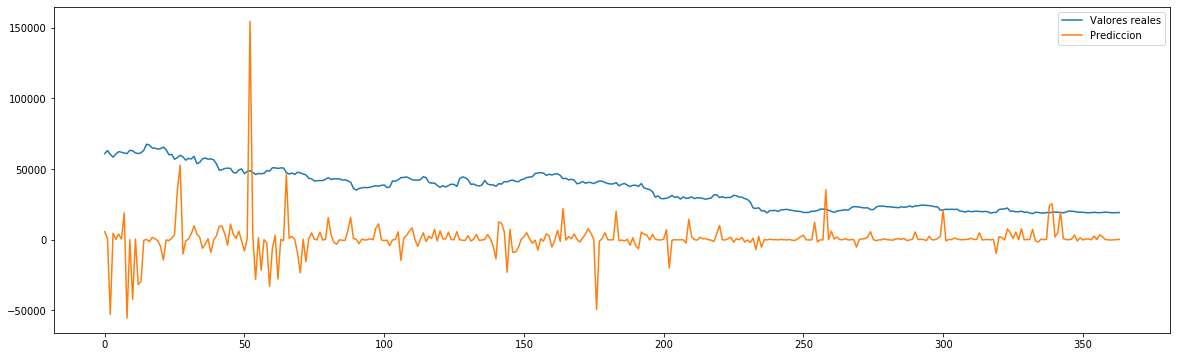

In [233]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [234]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35307.19346589679
R-cuadrado: -7.641842550318659
Tasa de acierto de subida: 0.5261707988980716


Modelo 32 neuronas:

In [235]:
modelLSTM32 = build_model1(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_264 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_265 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_266 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_267 (LSTM)             (None, 8)                 640       
                                                                 
 dense_47 (Dense)            (None, 1)                 9         
                                                                 
Total params: 9,369
Trainable params: 9,369
Non-trainable params: 0
_________________________________________________________________


In [236]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 6s 38ms/step - loss: 29106.1758
Epoch 2/100
46/46 [==============================] - 2s 38ms/step - loss: 24083.7441
Epoch 3/100
46/46 [==============================] - 2s 38ms/step - loss: 22943.0859
Epoch 4/100
46/46 [==============================] - 2s 38ms/step - loss: 23011.6055
Epoch 5/100
46/46 [==============================] - 2s 39ms/step - loss: 20905.1348
Epoch 6/100
46/46 [==============================] - 2s 39ms/step - loss: 20907.6621
Epoch 7/100
46/46 [==============================] - 2s 38ms/step - loss: 21121.2656
Epoch 8/100
46/46 [==============================] - 2s 38ms/step - loss: 22732.2676
Epoch 9/100
46/46 [==============================] - 2s 38ms/step - loss: 23512.3418
Epoch 10/100
46/46 [==============================] - 2s 38ms/step - loss: 24470.9160
Epoch 11/100
46/46 [==============================] - 2s 39ms/step - loss: 24107.4609
Epoch 12/100
46/46 [==============================] - 2s 38ms/s

In [237]:
y_predLSTM32 = modelLSTM32.predict(testX3)

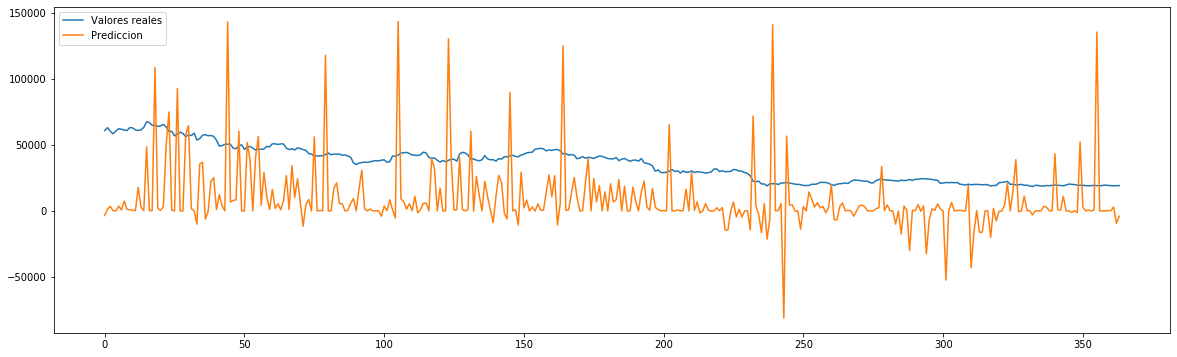

In [238]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [239]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 32227.35285532208
R-cuadrado: -6.522283530833863
Tasa de acierto de subida: 0.5371900826446281


#### EXPERIMENTO 2:  Modelo con 5 capas, mismas neuronas cada 2 capas

In [240]:
modelLSTM100 = build_model2(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_268 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_269 (LSTM)             (None, 35, 100)           80400     
                                                                 
 lstm_270 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_271 (LSTM)             (None, 50)                20200     
                                                                 
 dense_48 (Dense)            (None, 1)                 51        
                                                                 
Total params: 171,651
Trainable params: 171,651
Non-trainable params: 0
_________________________________________________________________


In [241]:
modelLSTM100.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM100 = modelLSTM100.evaluate(testX3, testy3)

Epoch 1/100
46/46 [==============================] - 9s 76ms/step - loss: 15812.0684 - mae: 15812.0684
Epoch 2/100
46/46 [==============================] - 4s 76ms/step - loss: 15720.5947 - mae: 15720.5947
Epoch 3/100
46/46 [==============================] - 4s 76ms/step - loss: 15808.0410 - mae: 15808.0410
Epoch 4/100
46/46 [==============================] - 4s 77ms/step - loss: 15853.9961 - mae: 15853.9961
Epoch 5/100
46/46 [==============================] - 4s 78ms/step - loss: 15867.2207 - mae: 15867.2207
Epoch 6/100
46/46 [==============================] - 4s 77ms/step - loss: 15776.8213 - mae: 15776.8213
Epoch 7/100
46/46 [==============================] - 3s 76ms/step - loss: 15756.6318 - mae: 15756.6318
Epoch 8/100
46/46 [==============================] - 4s 76ms/step - loss: 15769.0693 - mae: 15769.0693
Epoch 9/100
46/46 [==============================] - 4s 80ms/step - loss: 15746.7090 - mae: 15746.7090
Epoch 10/100
46/46 [==============================] - 4s 84ms/step - loss

In [242]:
y_predLSTM100 = modelLSTM100.predict(testX3)

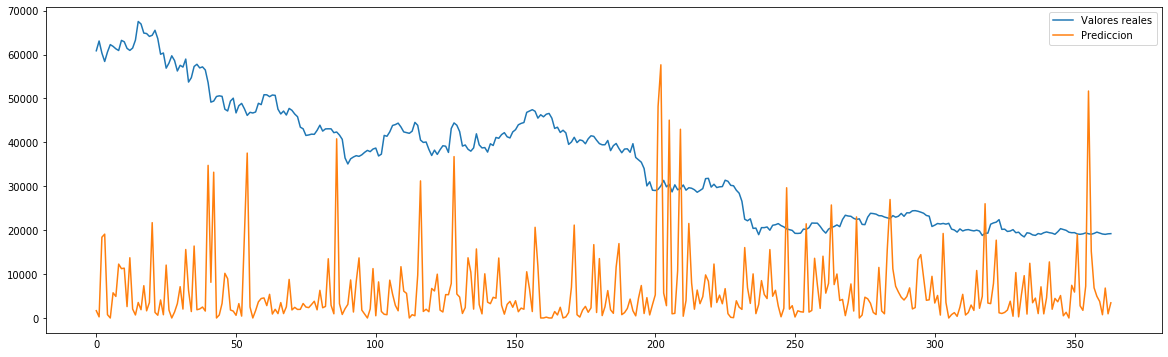

In [243]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [244]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 29957.97476141039
R-cuadrado: -5.178909107586831
Tasa de acierto de subida: 0.45179063360881544


Modelo 64 neuronas

In [245]:
modelLSTM64 = build_model2(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

Model: "sequential_50"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_272 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_273 (LSTM)             (None, 35, 64)            33024     
                                                                 
 lstm_274 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_275 (LSTM)             (None, 32)                8320      
                                                                 
 dense_49 (Dense)            (None, 1)                 33        
                                                                 
Total params: 70,689
Trainable params: 70,689
Non-trainable params: 0
_________________________________________________________________


In [246]:
modelLSTM64.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM64 = modelLSTM64.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 8s 58ms/step - loss: 16320.5342 - mae: 16320.5342
Epoch 2/100
46/46 [==============================] - 3s 58ms/step - loss: 16372.5137 - mae: 16372.5137
Epoch 3/100
46/46 [==============================] - 3s 59ms/step - loss: 16607.0117 - mae: 16607.0117
Epoch 4/100
46/46 [==============================] - 3s 59ms/step - loss: 16746.0996 - mae: 16746.0996
Epoch 5/100
46/46 [==============================] - 3s 58ms/step - loss: 16634.1230 - mae: 16634.1230
Epoch 6/100
46/46 [==============================] - 3s 58ms/step - loss: 15855.7012 - mae: 15855.7012
Epoch 7/100
46/46 [==============================] - 3s 58ms/step - loss: 16239.4258 - mae: 16239.4258
Epoch 8/100
46/46 [==============================] - 3s 58ms/step - loss: 15963.2139 - mae: 15963.2139
Epoch 9/100
46/46 [==============================] - 3s 59ms/step - loss: 15805.0146 - mae: 15805.0146
Epoch 10/100
46/46 [==============================] - 3s 58ms/step - loss

In [247]:
y_predLSTM64 = modelLSTM64.predict(testX3)

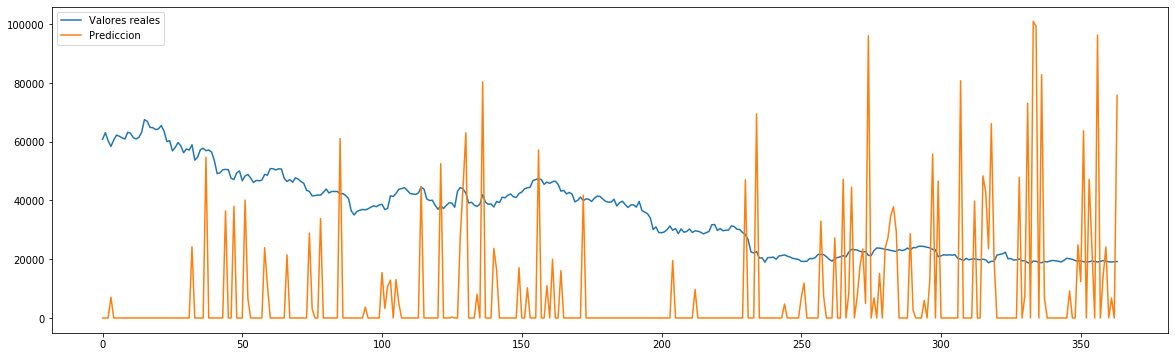

In [248]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [249]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33510.739576167536
R-cuadrado: -6.684126362214533
Tasa de acierto de subida: 0.5068870523415978


Modelo 32 neuronas:

In [250]:
modelLSTM32 = build_model2(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_276 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_277 (LSTM)             (None, 35, 32)            8320      
                                                                 
 lstm_278 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_279 (LSTM)             (None, 16)                2112      
                                                                 
 dense_50 (Dense)            (None, 1)                 17        
                                                                 
Total params: 17,937
Trainable params: 17,937
Non-trainable params: 0
_________________________________________________________________


In [251]:
modelLSTM32.fit(trainX3, trainy3, epochs=100)
 
# evaluamos el modelo
scoresLSTM32 = modelLSTM32.evaluate(testX3, testy3)
 

Epoch 1/100
46/46 [==============================] - 7s 42ms/step - loss: 16026.7725 - mae: 16026.7725
Epoch 2/100
46/46 [==============================] - 2s 41ms/step - loss: 16015.5420 - mae: 16015.5420
Epoch 3/100
46/46 [==============================] - 2s 41ms/step - loss: 15963.1787 - mae: 15963.1787
Epoch 4/100
46/46 [==============================] - 2s 40ms/step - loss: 15977.3076 - mae: 15977.3076
Epoch 5/100
46/46 [==============================] - 2s 40ms/step - loss: 16023.3213 - mae: 16023.3213
Epoch 6/100
46/46 [==============================] - 2s 40ms/step - loss: 15976.9150 - mae: 15976.9150
Epoch 7/100
46/46 [==============================] - 2s 41ms/step - loss: 16016.8164 - mae: 16016.8164
Epoch 8/100
46/46 [==============================] - 2s 42ms/step - loss: 16048.7842 - mae: 16048.7842
Epoch 9/100
46/46 [==============================] - 2s 41ms/step - loss: 16049.2227 - mae: 16049.2227
Epoch 10/100
46/46 [==============================] - 2s 41ms/step - loss

In [252]:
y_predLSTM32 = modelLSTM32.predict(testX3)

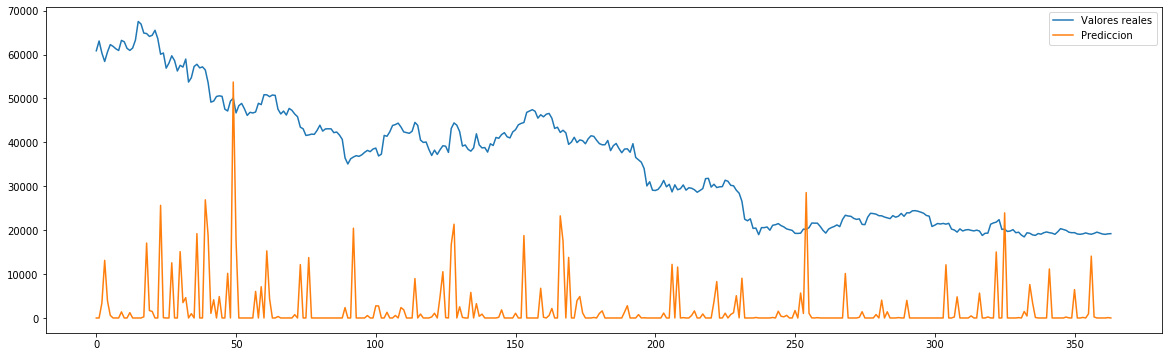

In [253]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [254]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33381.014569698666
R-cuadrado: -6.193544725769417
Tasa de acierto de subida: 0.5206611570247934


### EXPERIMENTO 3: Modelo 10 capas

Modelo 100 neuronas:

In [255]:
modelLSTM100 = build_model3(100,1,'relu','mae','adagrad')
modelLSTM100.summary()

modelLSTM100.fit(trainX3, trainy3, epochs=100)
 

Model: "sequential_52"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_280 (LSTM)             (None, 35, 100)           40800     
                                                                 
 lstm_281 (LSTM)             (None, 35, 50)            30200     
                                                                 
 lstm_282 (LSTM)             (None, 35, 33)            11088     
                                                                 
 lstm_283 (LSTM)             (None, 35, 25)            5900      
                                                                 
 lstm_284 (LSTM)             (None, 35, 20)            3680      
                                                                 
 lstm_285 (LSTM)             (None, 35, 17)            2584      
                                                                 
 lstm_286 (LSTM)             (None, 35, 14)          

In [256]:
y_predLSTM100 = modelLSTM100.predict(testX3)

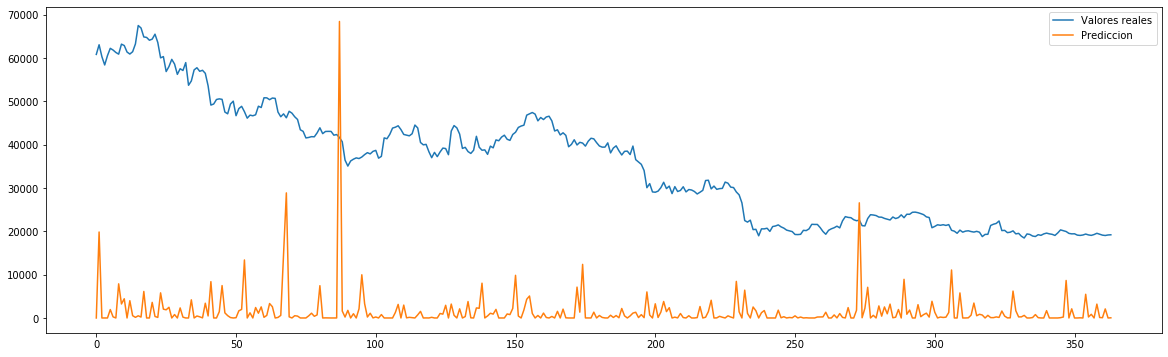

In [257]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM100, label = "Prediccion")
plt.legend()

In [258]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM100)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM100))
print("R-cuadrado:", r2_score(testy3, y_predLSTM100))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33985.05677682045
R-cuadrado: -6.409675332230041
Tasa de acierto de subida: 0.46831955922865015


Modelo 64 neuronas:

In [259]:
modelLSTM64 = build_model3(64,1,'relu','mae','adagrad')
modelLSTM64.summary()

modelLSTM64.fit(trainX3, trainy3, epochs=100)

Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_289 (LSTM)             (None, 35, 64)            16896     
                                                                 
 lstm_290 (LSTM)             (None, 35, 32)            12416     
                                                                 
 lstm_291 (LSTM)             (None, 35, 21)            4536      
                                                                 
 lstm_292 (LSTM)             (None, 35, 16)            2432      
                                                                 
 lstm_293 (LSTM)             (None, 35, 13)            1560      
                                                                 
 lstm_294 (LSTM)             (None, 35, 11)            1100      
                                                                 
 lstm_295 (LSTM)             (None, 35, 9)           

Epoch 63/100
46/46 [==============================] - 4s 96ms/step - loss: 15762.8867 - mae: 15762.8867
Epoch 64/100
46/46 [==============================] - 4s 90ms/step - loss: 15711.0459 - mae: 15711.0459
Epoch 65/100
46/46 [==============================] - 4s 90ms/step - loss: 15836.7793 - mae: 15836.7793
Epoch 66/100
46/46 [==============================] - 4s 92ms/step - loss: 15781.6143 - mae: 15781.6143
Epoch 67/100
46/46 [==============================] - 4s 90ms/step - loss: 15655.7148 - mae: 15655.7148
Epoch 68/100
46/46 [==============================] - 4s 90ms/step - loss: 15603.6309 - mae: 15603.6309
Epoch 69/100
46/46 [==============================] - 4s 90ms/step - loss: 15796.6445 - mae: 15796.6445
Epoch 70/100
46/46 [==============================] - 4s 92ms/step - loss: 15674.4160 - mae: 15674.4160
Epoch 71/100
46/46 [==============================] - 4s 90ms/step - loss: 15704.6162 - mae: 15704.6162
Epoch 72/100
46/46 [==============================] - 4s 90ms/st

In [260]:
y_predLSTM64 = modelLSTM64.predict(testX3)

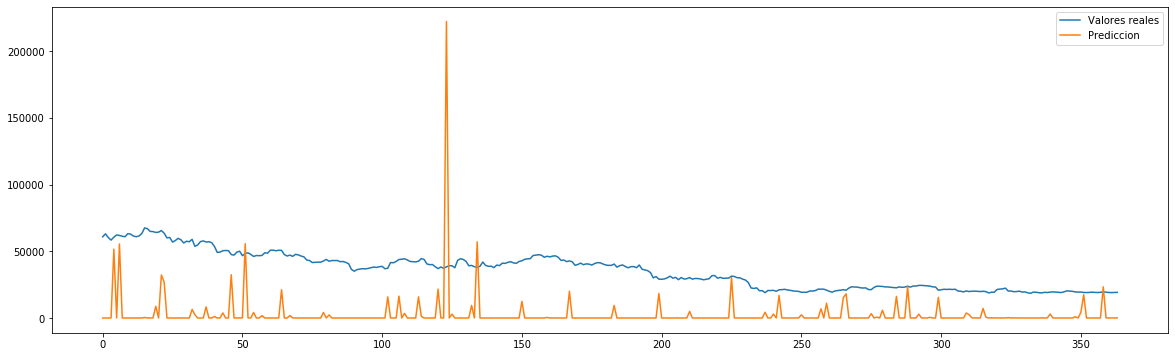

In [261]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM64, label = "Prediccion")
plt.legend()

In [262]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM64)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM64))
print("R-cuadrado:", r2_score(testy3, y_predLSTM64))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 33857.984395999214
R-cuadrado: -6.822411948110288
Tasa de acierto de subida: 0.559228650137741


Modelo 32 neuronas:

In [263]:
modelLSTM32 = build_model3(32,1,'relu','mae','adagrad')
modelLSTM32.summary()

modelLSTM32.fit(trainX3, trainy3, epochs=100)

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_298 (LSTM)             (None, 35, 32)            4352      
                                                                 
 lstm_299 (LSTM)             (None, 35, 16)            3136      
                                                                 
 lstm_300 (LSTM)             (None, 35, 11)            1232      
                                                                 
 lstm_301 (LSTM)             (None, 35, 8)             640       
                                                                 
 lstm_302 (LSTM)             (None, 35, 6)             360       
                                                                 
 lstm_303 (LSTM)             (None, 35, 5)             240       
                                                                 
 lstm_304 (LSTM)             (None, 35, 5)           

46/46 [==============================] - 4s 79ms/step - loss: 16284.2432 - mae: 16284.2432
Epoch 64/100
46/46 [==============================] - 4s 80ms/step - loss: 16284.1846 - mae: 16284.1846
Epoch 65/100
46/46 [==============================] - 4s 82ms/step - loss: 16284.1104 - mae: 16284.1104
Epoch 66/100
46/46 [==============================] - 4s 79ms/step - loss: 16284.0381 - mae: 16284.0381
Epoch 67/100
46/46 [==============================] - 4s 79ms/step - loss: 16283.9639 - mae: 16283.9639
Epoch 68/100
46/46 [==============================] - 4s 79ms/step - loss: 16283.8867 - mae: 16283.8867
Epoch 69/100
46/46 [==============================] - 4s 85ms/step - loss: 16283.8418 - mae: 16283.8418
Epoch 70/100
46/46 [==============================] - 4s 88ms/step - loss: 16283.7383 - mae: 16283.7383
Epoch 71/100
46/46 [==============================] - 4s 88ms/step - loss: 16283.5957 - mae: 16283.5957
Epoch 72/100
46/46 [==============================] - 4s 87ms/step - loss: 16

In [264]:
y_predLSTM32 = modelLSTM32.predict(testX3)

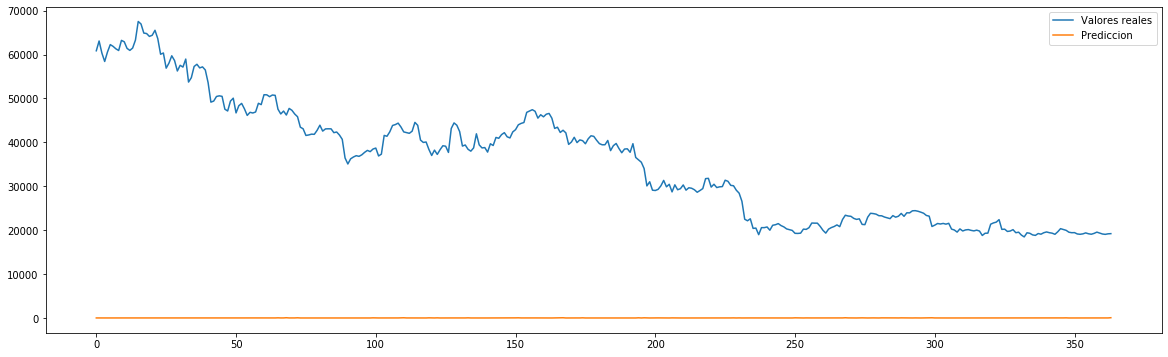

In [265]:
plt.figure(figsize = (20,6))
plt.plot(testy3.reset_index(drop=True),label = "Valores reales")
plt.plot(y_predLSTM32, label = "Prediccion")
plt.legend()

In [266]:
test3 =subida(testy3)
pred3 = subida(y_predLSTM32)
print("Error Absoluto Medio:", mean_absolute_error(testy3, y_predLSTM32))
print("R-cuadrado:", r2_score(testy3, y_predLSTM32))
print('Tasa de acierto de subida:', acierto(test3,pred3))

Error Absoluto Medio: 35398.98531470341
R-cuadrado: -6.954514846729166
Tasa de acierto de subida: 0.5206611570247934


## GRAFICAMENTE:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.DataFrame()
df1['100 Neuronas'] = None
df1['64 Neuronas'] = None
df1['32 Neuronas'] = None
df1.loc['Experimento 1- RELU+ADAM'] = [1973.7995032156991,2666.242810026385,3804.434165026179]
df1.loc['Experimento 2- RELU+ADAM'] = [2861.758940880607,2462.9635624175457, 1912.7398742579155]
df1.loc['Experimento 3- RELU+ADAM'] = [1467.3471334927438,1513.7047979881265,26518.848483034097]
df1.loc['Experimento 1- RELU+ADAGRAD'] = [31076.30711284559,12952.826914268635,26715.330363373367]
df1.loc['Experimento 2- RELU+ADAGRAD'] = [4757.081362446405,17274.226692132874,6155.410764140831]
df1.loc['Experimento 3- RELU+ADAGRAD'] = [7376.306007894954,6523.096016398004,36189.566912928756]
df1

100 Neuronas   64 Neuronas   32 Neuronas
Experimento 1- RELU+ADAM      1973.799503   2666.242810   3804.434165
Experimento 2- RELU+ADAM      2861.758941   2462.963562   1912.739874
Experimento 3- RELU+ADAM      1467.347133   1513.704798  26518.848483
Experimento 1- RELU+ADAGRAD  31076.307113  12952.826914  26715.330363
Experimento 2- RELU+ADAGRAD   4757.081362  17274.226692   6155.410764
Experimento 3- RELU+ADAGRAD   7376.306008   6523.096016  36189.566913

In [4]:
df2 = pd.DataFrame()
df2['100 Neuronas'] = None
df2['64 Neuronas'] = None
df2['32 Neuronas'] = None
df2.loc['Experimento 1- RELU+ADAM'] = [5963.491315599525,1942.3044383704141,7728.770013799253]
df2.loc['Experimento 2- RELU+ADAM'] = [4825.21657757303,10726.369643766982,13785.5514708087]
df2.loc['Experimento 3- RELU+ADAM'] = [16804.46060260275,5443.174284986413,1803.4804577105979]
df2.loc['Experimento 1- RELU+ADAGRAD'] = [29890.374075582753,31312.97063141689,36880.118230769316]
df2.loc['Experimento 2- RELU+ADAGRAD'] = [21995.247293533655,20097.589929822843,27054.265690751876]
df2.loc['Experimento 3- RELU+ADAGRAD'] = [28241.53695925008,4937.072500371518,35417.584983232904]
df2

100 Neuronas   64 Neuronas   32 Neuronas
Experimento 1- RELU+ADAM      5963.491316   1942.304438   7728.770014
Experimento 2- RELU+ADAM      4825.216578  10726.369644  13785.551471
Experimento 3- RELU+ADAM     16804.460603   5443.174285   1803.480458
Experimento 1- RELU+ADAGRAD  29890.374076  31312.970631  36880.118231
Experimento 2- RELU+ADAGRAD  21995.247294  20097.589930  27054.265691
Experimento 3- RELU+ADAGRAD  28241.536959   4937.072500  35417.584983

In [5]:
df3 = pd.DataFrame()
df3['100 Neuronas'] = None
df3['64 Neuronas'] = None
df3['32 Neuronas'] = None
df3.loc['Experimento 1- RELU+ADAM'] = [8966.60805709671,7200.482697780735,8150.095854969418]
df3.loc['Experimento 2- RELU+ADAM'] = [35201.32378884787,35407.21494505495,35407.21494505495]
df3.loc['Experimento 3- RELU+ADAM'] = [4763.882644445398,19593.086996158137,35289.6183500893]
df3.loc['Experimento 1- RELU+ADAGRAD'] = [29860.939958360323,35307.19346589679,32227.35285532208]
df3.loc['Experimento 2- RELU+ADAGRAD'] = [29957.97476141039,33510.739576167536,33381.014569698666]
df3.loc['Experimento 3- RELU+ADAGRAD'] = [33985.05677682045,33857.984395999214,35398.98531470341]
df3

100 Neuronas   64 Neuronas   32 Neuronas
Experimento 1- RELU+ADAM      8966.608057   7200.482698   8150.095855
Experimento 2- RELU+ADAM     35201.323789  35407.214945  35407.214945
Experimento 3- RELU+ADAM      4763.882644  19593.086996  35289.618350
Experimento 1- RELU+ADAGRAD  29860.939958  35307.193466  32227.352855
Experimento 2- RELU+ADAGRAD  29957.974761  33510.739576  33381.014570
Experimento 3- RELU+ADAGRAD  33985.056777  33857.984396  35398.985315

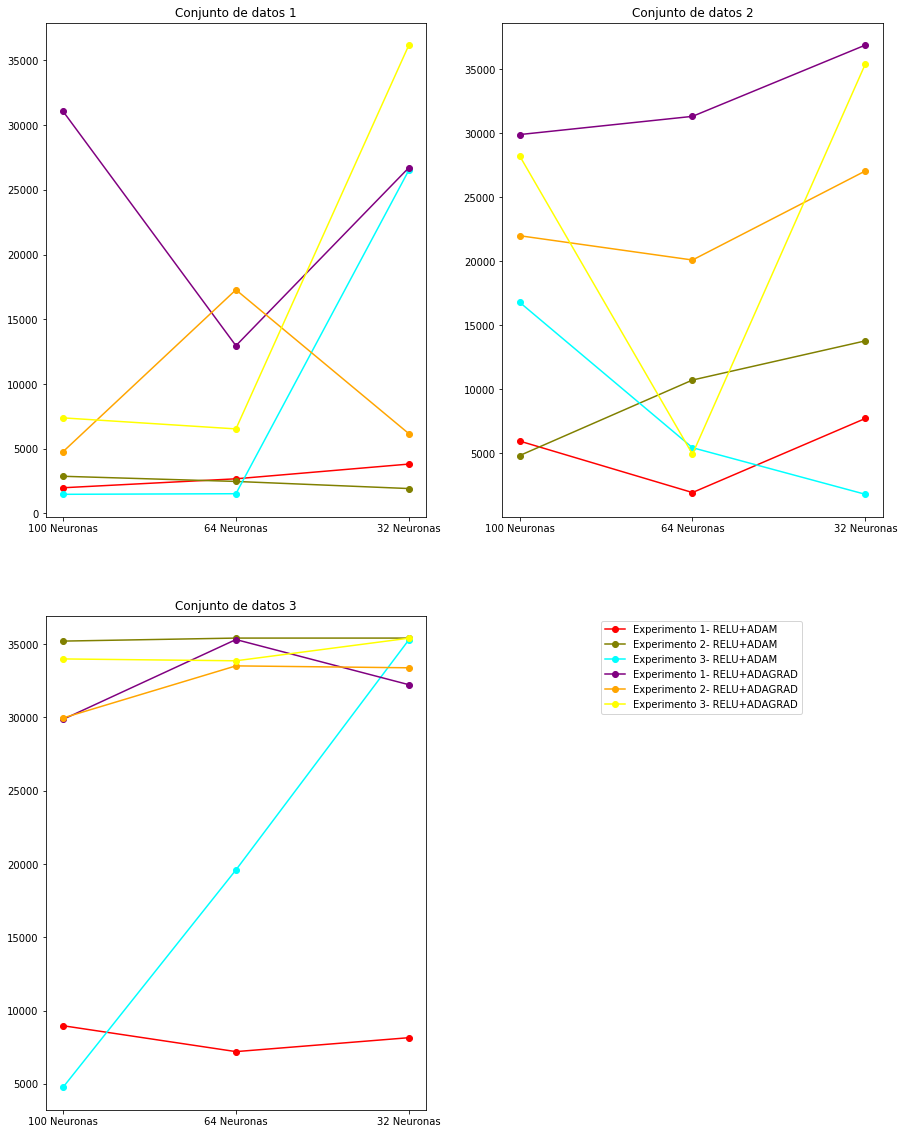

In [6]:
fig = plt.figure(figsize=(15,20))
fig.add_subplot(2,2,1)
plt.plot(df1.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df1.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df1.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df1.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df1.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df1.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 1')
fig.add_subplot(2,2,2)
plt.plot(df2.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM' ,color ='red')
plt.plot(df2.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df2.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df2.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df2.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df2.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 2')
fig.add_subplot(2,2,3)
plt.plot(df3.loc['Experimento 1- RELU+ADAM'],'o-',label ='Experimento 1- RELU+ADAM',color ='red')
plt.plot(df3.loc['Experimento 2- RELU+ADAM'],'o-',label ='Experimento 2- RELU+ADAM',color ='olive')
plt.plot(df3.loc['Experimento 3- RELU+ADAM'],'o-',label ='Experimento 3- RELU+ADAM',color ='cyan')
plt.plot(df3.loc['Experimento 1- RELU+ADAGRAD'],'o-',label ='Experimento 1- RELU+ADAGRAD',color ='purple')
plt.plot(df3.loc['Experimento 2- RELU+ADAGRAD'],'o-',label ='Experimento 2- RELU+ADAGRAD',color ='orange')
plt.plot(df3.loc['Experimento 3- RELU+ADAGRAD'],'o-',label ='Experimento 3- RELU+ADAGRAD',color ='yellow')
plt.title('Conjunto de datos 3')
plt.legend(bbox_to_anchor = (2, 1))